In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import stepwise_regression

In [19]:
from Filter_and_Grid_Search import *
import os
from sklearn.externals import joblib as skjoblib
import joblib
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import label_binarize
from importlib import reload
import Filter_and_Grid_Search
Filter_and_Grid_Search = reload(Filter_and_Grid_Search)

In [20]:
import pandas as pd
import numpy as np
import json

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.utils import resample

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier

import pydotplus 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
import math

from datetime import datetime
import scipy.stats as st
from collections import Counter
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array

from sklearn.utils import check_consistent_length
from sklearn.utils import column_or_1d, assert_all_finite
from sklearn.utils.extmath import stable_cumsum
from sklearn.utils.multiclass import type_of_target

import collections

In [21]:
import numpy as np
from numpy import array
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import math

import matplotlib.pylab as plt
from matplotlib.pyplot import cm
import seaborn as sns
import itertools
import collections
from collections import OrderedDict, Counter

import scipy.stats as stats
from scipy.stats import normaltest, kstest, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, levene, bartlett
from scipy.stats import chi2_contingency, fisher_exact, mode, pearsonr, f_oneway, kruskal, spearmanr

#from rfpimp import *

from datetime import datetime
import re
from seaborn import heatmap
import random
import statsmodels.distributions.empirical_distribution as edf
from scipy.interpolate import interp1d
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.utils import resample
from functools import reduce
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn import metrics, preprocessing
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, log_loss, recall_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PowerTransformer

from sklearn.utils import check_consistent_length, column_or_1d, assert_all_finite
from sklearn.utils.extmath import stable_cumsum
from sklearn.utils.multiclass import type_of_target
from sklearn.linear_model import LogisticRegression
import re
import gc

import os
import psutil
from sklearn.externals import joblib

from importlib import reload
import Filter_and_Grid_Search
Filter_and_Grid_Search = reload(Filter_and_Grid_Search)
from Filter_and_Grid_Search import stratified_split
from Filter_and_Grid_Search import attributes_list, attributes_list_new
from Filter_and_Grid_Search import get_s_stat, get_PSI_stat, get_stats_by_month, get_stats, stable_unstable
from Filter_and_Grid_Search import stable_unstable_by_month_divide, union_datas, individual_hists_all 
from Filter_and_Grid_Search import paired_time_hists_by_month, statistics_with_target
from Filter_and_Grid_Search import receive_correlations, find_doubles_corr
from Filter_and_Grid_Search import statistics_with_target, attributes_list, attributes_list_new, make_standard
from Filter_and_Grid_Search import data_preprocessing_train, data_preprocessing_test
from Filter_and_Grid_Search import receive_correlations, find_doubles_corr
from Filter_and_Grid_Search import stratified_split, two_forests, turn_variables_with_values
from Filter_and_Grid_Search import find_meta_params, calculate_vif#, find_meta_params_mem
from Filter_and_Grid_Search import plot_meta_2d, data_preprocessing, find_ouliers_iqr
from Filter_and_Grid_Search import train_model_receive_stats, simple_b_score_risk
from Filter_and_Grid_Search import max_prof_corve, by_month_gini, check_attribute_list_cases

from statsmodels.stats.proportion import proportions_ztest

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Data upload

In [22]:
PATH_ROOT = 'D:/Share/01 -Risk Desc Science/CRM/Branch_2019/'
PATH = PATH_ROOT  #путь папки с моделью
print(PATH)

D:/Share/01 -Risk Desc Science/CRM/Branch_2019/


In [24]:
description_file = 'D:/Share/01 -Risk Desc Science/CRM/Branch_2019/Переменные_trigger_Branch.xlsx' 
field_for_var_in_desc = 'Переменная' 
field_for_comment_in_desc = 'Описание' 
field_for_type_in_desc = 'Тип' 

categorial_file = 'D:/Share/01 -Risk Desc Science/CRM/Branch_2019/Переменные_trigger_Branch_категориальные.xlsx'
field_for_var_in_cats = 'Переменная' 

In [25]:
datasets_file = 'data_Branch.zip' 
train_data = 'Branch_train_for_model.zip' 
test_data = 'Branch_test_for_model.zip' 
oot_data = 'Branch_oot_for_model.zip' 

black_list = 'Переменные_trigger_Branch_black_list.xlsx'
black_field_var = 'Переменная' 
filename_dump = 'Branch.data' 

task = 'binary' #
missing_strings = 'MISSING'
p_value = 0.05 

recommended_list = False 
target_dict = {'good': 1, 'bad': 0}

In [26]:
target = 'good_flag'
index_month = 'month_call' 
list_of_vars_for_strat = ['month_call'] 
sort_by_var = 'cif_id'

necessary_fields = [target, index_month, sort_by_var] 
necessary_fields_upper = [target.upper(), index_month.upper(), sort_by_var.upper()] 


COL_SYS = ['INITIATED_DT', 'ROBOT_DAY', 'DEL_FLAG', 'INITIATED_DT_OUT',
'CALL_OUT_DAY', 'SD', 'SMS_DAY', 'MONTHCALLMINUS2',
'XSBASEDT_24M', 'XSBASEDT_12M', 'CALLDT', 'CALCDT_1M',
'CALCDT_3M', 'CALCDT_6M', 'CALCDT_12M', 'CALCDT_24M',
'CLIENT_NUMBER_TEXT', 'CIF_ID_TEXT', 'CLIENT_NUMBER',
'DATE_REPORT_O', 'DATE_REPORT_B', 'SUPERID', 'SUPERID_OPEN',
'SUPERID_AP', 'SUPERID_BUREAU', 'BUREAU_DT', 'UNNAMED: 0', index_month.upper()+'_GROSS', 'ACTIVE_IND']
COL_TRG = target.upper()
hyper_disbalance= False

In [27]:
list_of_vars_for_strat_upper = [c.upper() for c in list_of_vars_for_strat]
sort_by_var_upper = sort_by_var.upper()

In [28]:
target = target.upper()

In [13]:
file_name = PATH + 'Selection/excel/11. f_target_s_aft_bin.xlsx'
stay7 = pd.read_excel(file_name)

In [14]:
def_2 = stay7['feature'].to_list()

# Two Forest with correlation (CFSS)

In [15]:
all_columns = pd.read_csv(PATH + 'Selection/SandBox/all_columns_for_forest.csv', sep = '&')

In [16]:
all_columns = pd.read_csv(PATH + 'Selection/SandBox/selected_features_forest_definition.csv', sep = '&')

In [17]:
data1 = pd.read_csv(PATH + 'Data Sets/' +  train_data, sep = '&', encoding = 'cp1251')
data1.columns = [col.upper() for col in data1.columns]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1195) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
data = turn_variables_with_values(data1, all_columns)

In [19]:
columns = data.columns

In [20]:
#data = pd.read_csv(PATH+'Data Sets/train_binned.csv', sep = '&', encoding = 'cp1251')
categorial_data = pd.read_csv(PATH+'Selection/SandBox/categorial_data.csv', sep='&')
sys_data = pd.read_csv(PATH+'Selection/SandBox/sys_data.csv', sep='&')
del_data = pd.read_csv(PATH+'Selection/SandBox/del_data.csv', sep='&')
changes = pd.read_csv(PATH + 'Selection/SandBox/changes.csv', sep = '&')

In [21]:
categorial_columns = categorial_data['variable'].to_list()
COL_SYS = sys_data['variable'].to_list()
COL_DEL = del_data['variable'].to_list()

In [22]:
necessary_fields_upper

['GOOD_FLAG', 'MONTH_CALL', 'CIF_ID']

In [23]:
gc.collect()

102

In [24]:
columns = list(data.columns)

In [25]:
file_name = PATH + 'Selection/excel/12. COR_NUM_binned.xlsx'
correlation_num1 = pd.read_excel(file_name)
file_name = PATH + 'Selection/excel/12. COR_CAT_binned.xlsx'
correlation_cat1 = pd.read_excel(file_name)
definition_2 = pd.read_csv(PATH + 'Selection/SandBox/definition_2.csv')

In [26]:
correlation_cat1.set_index('Unnamed: 0', inplace = True)
correlation_num1.set_index('Unnamed: 0', inplace = True)

In [27]:
correlation_num1.head()

,FUNDEDAMT_O,COUNTPAIDOUT_O,MAXMOBOPENEVER_ALL_O,MOBC_ALL_O,COUNTOFPAYMENTSL24M_O,COUNTOFPAYMENTSL12M_O,COUNTOFPAYMENTSL6M_O,COUNTOFPAYMENTSL3M_O,COUNTOFPAYMENTSCM_O,PAYAMTCM_O,...,C_SCHEDULE2FACTPAY12M,C_SCHEDULE2FACTPAY6M,C_SCHEDULE2FACTPAY1M,C_SCHEDULE2FACTPAY12M_ACTIVE,C_SCHEDULE2FACTPAY6M_ACTIVE,C_COUNTDAYSTASKL3M,C_COUNTOPERATORCALLL3M,AGE,EMPINCOMEAMT,CCDLOANRATE
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
FUNDEDAMT_O,1.000000,0.631588,0.332429,0.520042,0.467620,0.368827,0.298293,0.221677,0.124759,0.249152,...,0.038479,0.037526,0.001431,0.144804,0.094340,-0.031677,-0.041479,-0.018481,0.007235,0.127727
COUNTPAIDOUT_O,0.631588,1.000000,0.462896,0.737957,0.506750,0.353684,0.243662,0.152241,0.034977,0.102080,...,0.024838,0.015454,-0.005084,0.121531,0.077455,-0.050530,-0.074673,0.051403,0.007325,0.147292
MAXMOBOPENEVER_ALL_O,0.332429,0.462896,1.000000,0.872276,0.580076,0.420351,0.284050,0.172020,0.031850,0.022322,...,0.006390,-0.005149,0.008801,0.029232,0.020020,-0.049015,-0.086279,0.063419,0.007278,0.366514
MOBC_ALL_O,0.520042,0.737957,0.872276,1.000000,0.660897,0.488577,0.351970,0.240561,0.089038,0.050016,...,0.010075,0.000102,0.011878,0.058490,0.040514,-0.040299,-0.072178,0.074406,0.012370,0.304397
COUNTOFPAYMENTSL24M_O,0.467620,0.506750,0.580076,0.660897,1.000000,0.883232,0.702675,0.533400,0.273235,0.074207,...,0.009398,0.008473,0.021598,0.079123,0.061805,-0.045098,-0.070718,0.028171,0.001842,0.280343


In [28]:
result_tab_cat1, non_doubles_cat1, col_doubles_cat1, double_dic_cat1 = find_doubles_corr(data, columns, 
                                  correlation_cat1, definition = definition_2, lvl = 0.70, light_unstable = None)
result_tab_num1, non_doubles_num1, col_doubles_num1, double_dic_num1 = find_doubles_corr(data, columns, 
                                  correlation_num1, definition = definition_2, lvl = 0.70, light_unstable = None)

Порог = 0.7 Осталось фичей = 122 Коррелир.фичей = 336
Порог = 0.7 Осталось фичей = 269 Коррелир.фичей = 199


In [29]:
result_tab_cat1, non_doubles_cat1, col_doubles_cat1, double_dic_cat1 = find_doubles_corr(data, columns, 
                                  correlation_cat1, definition = definition_2, lvl = 0.50, light_unstable = None)
result_tab_num1, non_doubles_num1, col_doubles_num1, double_dic_num1 = find_doubles_corr(data, columns, 
                                  correlation_num1, definition = definition_2, lvl = 0.50, light_unstable = None)

Порог = 0.5 Осталось фичей = 80 Коррелир.фичей = 378
Порог = 0.5 Осталось фичей = 138 Коррелир.фичей = 330


In [30]:
non_doubles1 = list(set(non_doubles_cat1 + non_doubles_num1))

In [31]:
len(non_doubles1)

218

In [32]:
COL_DEL1 = []

for i in data.columns:
    if i not in non_doubles1 + necessary_fields_upper:
        COL_DEL1.append(i)

In [33]:
data.drop(COL_DEL1, axis = 1, inplace = True)

In [34]:
for i in necessary_fields_upper:
    if i not in list(data.columns):
        print(i)

In [36]:
data_prepr, scale = data_preprocessing_train(data, COL_TRG, 
                                technical_values = [COL_SYS+necessary_fields_upper], 
                                drop_technical = False,
                                yeo_johnson = False, 
                                attribute_list = None, 
                                var_col = None,
                                scale = 'mean', 
                                median = 'median',
                                high_outlier = 99, 
                                low_outlier = 1, 
                                cols_outlier = None)

data = data_preprocessing_train(data, COL_TRG, 
                                technical_values = [COL_SYS+necessary_fields_upper], 
                                drop_technical = False,
                                yeo_johnson = False, 
                                attribute_list = None, 
                                var_col = None,
                                scale = False, 
                                median = 'median',
                                high_outlier = None, 
                                low_outlier = None, 
                                cols_outlier = None)


CIF_ID
MAXPTIEVER_ACTUAL_O
MAXPTIEVER_O
SUMPAYCMTOMAXPAY_O
TRANSNUML3M_O
CASHL1M_O
CASHL12M_O
SUMPAYMENTCMTOLIMITCARD_O
SUMPAYMENTCMTOLIMIT_O
SUMPAYMENTL3MTOLIMIT_O
PAYCMTOBALCM_O
PAYL3MTOSUMBALL3M_O
PAYL6MTOSUMBALL6M_O
PAYL3MTOPAYL6M_O
TRANSNUMCMTOTRANSNUML12M_O
TRANSSUML6MTOTRANSSUML24M_O
TRANSAVGAMOUNTL12M_O
CASHCMTOBALANCE06_O
CASHCMTOLIMIT_O
CASHCMTOAVGLIMITL6M_O
MAXPAYMENTTOLIMIT_O
CASHL3MTOPAYAMTL3M_O
CASHL6MTOPAYMAMTL6M_O
MAXDAYSINDELINQTOTALEVER_B
COUNT00PEVER_B
MONTHSSINCELAST00P_B
SUMOVERDUE00PEVER_B
MAXDAYSINDELINQCURRENT_B
BALANCETOTOTALCURRENT_B
MAXOVERDUETOLIMITEVER_B
MAXBALANCETOTOTALEVER_B
MAXBALANCETOTOTALL3M_B
MAXBALANCETOTOTALL6M_B
BALCMTOBAL03AGO_B
BALCMTOBAL06AGO_B
BALCMTOBAL12AGO_B
CCARDMAXUTILLL24M_B
CCARDUTILLCMTOCCARDMAXUTILLL12_B
CCARDUTILZCURTOCCARDUTILZ03AGO_B
CCARDUTILZCURTOCCARDUTILZ06AGO_B
PRSDEPTENUM_AP
TOTAL_INCOME_CURR_AP
ADRTIMEINRSDNT_HOME_AP
ADRTIMEINRSDNT_REG_AP
EMPTIMEINJOB_AP
CREDITLIMITAMOUNT_AA
RATEPERCENT_AA
CCDAMTREQ_AA
CCDLOANTERM_AA
PURCHA

In [37]:
if 'Unnamed: 0' in data.columns.to_list():
    data.drop('Unnamed: 0', axis = 1, inplace = True)
    
if 'Unnamed: 0.1' in data.columns.to_list():
    data.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [38]:
data.head()

,CIF_ID,MAXPTIEVER_ACTUAL_O,MAXPTIEVER_O,SUMPAYCMTOMAXPAY_O,TRANSNUML3M_O,CASHL1M_O,CASHL12M_O,SUMPAYMENTCMTOLIMITCARD_O,SUMPAYMENTCMTOLIMIT_O,SUMPAYMENTL3MTOLIMIT_O,...,DISTANCE_bin,COUNTVERYNEGATIVE_12_bin,COUNTVERYPOSITIVE_24_bin,COUNTIN_24_bin,SUMONLYPOS_24_bin,C_DAYSBETWLASTDELINQS12M_bin,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,C_DAYSSINCELASTTPC12M_bin,C_COUNTIN2COUNTOUTALLL12M_CL_bin,EMPINCOMEAMT_bin
0,1000000653,0.233347,0.353232,1.000000,0.0,0.0,0.0,0.0,0.102020,0.306059,...,1,0,0,0,0,0,0,0,0,1
1,1000002153,0.357143,0.500000,0.333333,0.0,0.0,0.0,0.0,0.050073,0.151707,...,1,0,0,0,0,0,0,0,0,0
2,1000002599,0.334041,0.339517,0.096569,0.0,0.0,0.0,0.0,0.048048,0.144144,...,1,1,0,0,0,0,1,0,1,1
3,1000002599,0.334041,0.339517,0.096569,0.0,0.0,0.0,0.0,0.048048,0.144144,...,1,1,0,0,1,1,1,0,1,1
4,1000003476,0.357143,0.500000,0.333333,0.0,0.0,0.0,0.0,0.050073,0.151707,...,1,0,0,0,0,0,0,0,0,0


In [39]:
target = target.upper()

In [40]:
X_1, X_2, y_1, y_2 = stratified_split(data, target, list_of_vars_for_strat_upper, sort_by_var_upper, 
                                      size_of_test = 0.5, drop_technical = True, random_state = 241)

In [41]:
X_1.shape, X_1.dropna().shape

((151581, 218), (151581, 218))

In [39]:
once_rows = sum(data[target])
second_rows = (len(data[target]) - sum(data[target]))
y_unique = sorted(data[target].unique())
all_rows = len(data[target])

once_rows_share = once_rows/all_rows
second_rows_share = second_rows/all_rows
second_rows_share/once_rows_share

if once_rows < second_rows:
    w_b = once_rows/second_rows
else:
    w_b = second_rows/once_rows

In [40]:
once_rows_share, second_rows_share

(0.013356638744146165, 0.9866433612558538)

In [41]:
w_b

0.013537453621686667

In [45]:
if once_rows < second_rows:
    w1 = [{0:round(0.75*w_b, 4), 1: 1},
        {0:round(1.5*w_b, 4), 1: 1},
        {0:round(2.5*w_b, 4), 1: 1},
        {0:round(3*w_b, 4), 1: 1},
        {0:round(4*w_b, 4), 1: 1},
        {0:round(5*w_b, 4), 1: 1},
        {0:round(6*w_b, 4), 1: 1}
    ]
else:
    w1 = [{0:1, 1: round(0.5*w_b, 4)},
        {0:1, 1: round(0.75*w_b, 4)},
        {0:1, 1: round(1.5*w_b, 4)},
        {0:1, 1: round(2*w_b, 4)},
        {0:1, 1: round(3*w_b, 4)}
    ]

In [46]:
random_params = {'max_depth': 4, 'class_weight': {0: w_b, 1: 1}, 'n_estimators': data.shape[1], 
               'max_features': 0.15, 'min_samples_leaf': 5, 
               'min_samples_split': 10, 'random_state': 241}

In [47]:
rf = RandomForestClassifier(**random_params)
rf.fit(X_1, y_1)
y_pred = rf.predict_proba(X_1)[:,1]
y_pred_test = rf.predict_proba(X_2)[:,1]
av_tr = average_precision_score(y_1, y_pred)
auc_tr = roc_auc_score(y_1, y_pred)

av_t_1 = average_precision_score(y_2, y_pred_test)
auc_t = roc_auc_score(y_2, y_pred_test)
print('First', 'av_train = ', av_tr, 'auc_train = ', auc_tr, '\n')
print('First', 'av_test = ', av_t_1, 'auc_test = ', auc_t, '\n')


rf = RandomForestClassifier(**random_params)
rf.fit(X_2, y_2)
y_pred = rf.predict_proba(X_2)[:,1]
y_pred_test = rf.predict_proba(X_1)[:,1]
av_tr = metrics.average_precision_score(y_2, y_pred)
auc_tr = metrics.roc_auc_score(y_2, y_pred)

av_t_2 = metrics.average_precision_score(y_1, y_pred_test)
auc_t = metrics.roc_auc_score(y_1, y_pred_test)
print('Second', 'av_train = ', av_tr, 'auc_train = ', auc_tr, '\n')
print('Second', 'av_test = ', av_t_2, 'auc_test = ', auc_t, '\n')

First av_train =  0.04247305365909618 auc_train =  0.7421794800905773 

First av_test =  0.03176677256307364 auc_test =  0.719508722689287 

Second av_train =  0.0407818824423236 auc_train =  0.7445737823050109 

Second av_test =  0.03238104501742784 auc_test =  0.716493696412736 



In [49]:
importance_test, import1_test, import2_test = two_forests(X_1,
                                    y_1, X_2, y_2, param_dict = random_params, task = task, higher_is_better = True,
                                    use_metric = average_precision_score, treshold_metric = False, 
                                    features_list = None,
                                    n_samples_our = -1, several_perms = None, random_state = 241)

Start of random forest fit | time:  12.06.2020 12:07:39
First random forest end | time:  12.06.2020 12:09:37 score train= 0.04247305365909618 score= 0.03196297613627416
Second random forest end | time:  12.06.2020 12:11:42 score train= 0.04086886200505008 score= 0.03248537981103092
-------------------- START OF FIRST IMPORTANCE --------------------
Number of finished repetitions: 30 | time:  12.06.2020 12:13:38
Number of finished repetitions: 60 | time:  12.06.2020 12:15:29
Number of finished repetitions: 90 | time:  12.06.2020 12:17:20
Number of finished repetitions: 120 | time:  12.06.2020 12:19:11
Number of finished repetitions: 150 | time:  12.06.2020 12:21:02
Number of finished repetitions: 180 | time:  12.06.2020 12:22:54
Number of finished repetitions: 210 | time:  12.06.2020 12:24:43
First importance end | time:  12.06.2020 12:25:16
-------------------- START OF SECOND IMPORTANCE --------------------
Number of finished repetitions: 30 | time:  12.06.2020 12:27:05
Number of fini

In [2442]:
imp_test = importance_test.loc[importance_test['p_value'] < 0.1, 'Feature'].to_list()
len(imp_test)

119

In [51]:
file_name = PATH + 'Selection/excel/14. importance2.xlsx'
importance_test.to_excel(file_name, index = False)

In [2441]:
file_name = PATH + 'Selection/excel/14. importance2.xlsx'
importance_test = pd.read_excel(file_name, index = False)

In [2443]:
vif_del = []

In [53]:
vif = calculate_vif(data[imp_test])
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

12.06.2020 12:38:41 0 C_COUNTOFGP
12.06.2020 12:39:27 10 DLQ_PD_MAXSUM_C
12.06.2020 12:40:11 20 C_DAYSSINCELASTOUTBOUNDL6M
12.06.2020 12:40:59 30 AR_IRATE_AVG_C
12.06.2020 12:41:44 40 CCDLOANTERM_AA
12.06.2020 12:42:28 50 RATEPERCENT_AA
12.06.2020 12:43:15 60 MICRO2ALL_24M_C
12.06.2020 12:44:00 70 PURCHASEAMOUNT_MAX_AA
12.06.2020 12:44:48 80 TYPELASTCALL_2020_12_POSITIVE
12.06.2020 12:45:32 90 MAXPAYMENTTOLIMIT_O
12.06.2020 12:46:18 100 DLQ_WRSTARR25E_C
12.06.2020 12:47:05 110 CCDCREDITPOINT_AA_20.0


In [54]:
vif.head()

,Features,VIF
33,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,4.795481
43,R_AMT_OPEN_REP_bin,4.790216
0,C_COUNTOFGP,4.679750
42,C_COUNTOFIL,4.331290
65,R_CNT_OPEN2ALL_REP,3.025335


In [55]:
vif = vif.sort_values(by = 'VIF', ascending = False).reset_index()
while vif['VIF'][0] > 10:
    print(vif.head(5))
    c = vif.Features[0]
    vif_del.append(c)
    print('Delete ', c)
    vif = calculate_vif(data[[c for c in imp_test if c not in vif_del]])
    vif = vif.sort_values(by = 'VIF', ascending = False).reset_index()

In [56]:
vif.head()

,index,Features,VIF
0,33,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,4.795481
1,43,R_AMT_OPEN_REP_bin,4.790216
2,0,C_COUNTOFGP,4.679750
3,42,C_COUNTOFIL,4.331290
4,65,R_CNT_OPEN2ALL_REP,3.025335


In [57]:
len(vif_del)

0

In [2444]:
new_features_list = []
cols = ['new variable', 'genuine variable', 'rule', 'values']

for i in imp_test:
    if i in list(changes['new variable']):
        change = changes[changes['new variable'] == i]
        new_features_list.append([list(change['new variable'])[0], list(change['genuine variable'])[0], 
                                  list(change['rule'])[0], list(change['values'])[0]])
    else:
        new_features_list.append([i, i, 'Missing', np.nan])
        
for i in necessary_fields_upper:
    new_features_list.append([i, i, 'Missing', np.nan])
    
new_features_data = pd.DataFrame.from_records(new_features_list, columns = cols)
new_features_data_no_vif = new_features_data[~new_features_data['new variable'].isin(vif_del)]
new_features_data_no_vif_no_sys = new_features_data_no_vif[~new_features_data_no_vif['new variable'].isin(necessary_fields_upper)]

In [2445]:
new_features_data.shape, new_features_data_no_vif.shape

((122, 4), (122, 4))

In [2446]:
new_features_data.to_csv(PATH + 'Selection/SandBox/selected_features_forest_experiment.csv', sep = '&')
new_features_data_no_vif.to_csv(PATH + 'Selection/SandBox/selected_features_forest_vif_experiment.csv', sep = '&')
new_features_data_no_vif_no_sys.to_csv(PATH + 'Selection/SandBox/selected_features_forest_vif_no_sys_experiment.csv', sep = '&')

In [2447]:
#new_features_data = pd.read_csv(PATH + 'Selection/SandBox/selected_features_forest_experiment.csv', sep = '&')
#new_features_data_no_vif= pd.read_csv(PATH + 'Selection/SandBox/selected_features_forest_vif_experiment.csv', sep = '&')
#new_features_data_no_vif_no_sys= pd.read_csv(PATH + 'Selection/SandBox/selected_features_forest_vif_no_sys_experiment.csv', sep = '&')

In [2448]:
modeling = 'experiment'

In [2449]:
selected_features = new_features_data_no_vif
sel_c = selected_features['genuine variable'].to_list()

In [2450]:
gc.collect()

3167

In [2451]:
train = pd.read_csv(PATH + 'Data Sets/' +  train_data, sep = '&', encoding = 'cp1251')
train.columns = [col.upper() for col in train.columns]

test = pd.read_csv(PATH + 'Data Sets/' +  test_data, sep = '&', encoding = 'cp1251')
test.columns = [col.upper() for col in test.columns]

oot = pd.read_csv(PATH + 'Data Sets/' +  oot_data, sep = '&', encoding = 'cp1251')
oot.columns = [col.upper() for col in oot.columns]

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1195) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2452]:
train = turn_variables_with_values(train, selected_features)
test = turn_variables_with_values(test, selected_features)
oot = turn_variables_with_values(oot, selected_features)

In [2453]:
target = target.upper()

In [2454]:
y_train = train[target]
y_test = test[target]
y_oot = oot[target]

train.drop(target, axis = 1, inplace = True)
test.drop(target, axis = 1, inplace = True)
oot.drop(target, axis = 1, inplace = True)

In [2455]:
train.head()

,C_COUNTOFGP,PTI_FINAL_AD,BALCMTOBAL03AGO_B,C_SCHEDULE2FACTPAY12M_ACTIVE,BALCMTOBAL06AGO_B,C_SUMOFPAYMENTSL1M2TD,PTI_AD,PAYCMTOBALCM_O,MAXPTIEVER_O,R_CNT_ALL_GP_REP,...,PRSEDULEVEL_4.0,CLOSED24_SUM_C,TYPELASTCALL_24_VERY NEGATIVE,C_RPCALL2ANYPERSONCONTACTL6M,CCDCREDITPOINT_AA_20.0,TRANSNUML3M_O,DLQ_PD2AMTOUTS_C_bin,DISTANCE,MONTH_CALL,CIF_ID
0,0,NaN,0.823748,NaN,NaN,NaN,0.40921,0.144207,0.353232,0.0,...,1,803599.0,0,NaN,0,NaN,1,0.0,201911,1000000653
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,NaN,0,NaN,0,NaN,0,0.0,201911,1000002153
2,0,0.16212,0.920952,1.037646,NaN,0.056704,0.38788,0.054223,0.339517,0.0,...,0,NaN,0,NaN,0,NaN,1,0.0,201911,1000002599
3,0,NaN,0.912640,1.037646,0.808715,0.124955,NaN,0.059413,0.339517,0.0,...,0,NaN,0,NaN,0,NaN,1,0.0,202001,1000002599
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,NaN,0,NaN,0,NaN,0,0.0,201911,1000003476


In [2456]:
list_of_columns = selected_features['new variable'].to_list()
list_of_columns_no_sys = list_of_columns.copy()
for i in necessary_fields_upper:
    if i in list_of_columns_no_sys:
        list_of_columns_no_sys.remove(i)

In [2457]:
len(list_of_columns_no_sys)

119

In [2458]:
attribute_list_model = attributes_list_new(train, list_of_columns_no_sys, [0.01, 0.5, 1, 2, 5, 95, 97, 
                                                                           98, 99, 99.5, 99.99])

[1.000e-04 5.000e-03 1.000e-02 2.000e-02 5.000e-02 9.500e-01 9.700e-01
 9.800e-01 9.900e-01 9.950e-01 9.999e-01]
Number of finished repetitions: 0 | time:  03.07.2020 13:23:32
Number of finished repetitions: 100 | time:  03.07.2020 13:23:43


In [2459]:
attribute_list_model[attribute_list_model['99%'] == attribute_list_model['1%']]

,attribute,type_val,count_dist,count_miss,moda_val,count_value_moda,count_val,mean,stand_d_val,min_val,...,2%,5%,val_mediana,95%,97%,98%,99%,99.5%,99.99%,max_val


In [2460]:
list_of_categories_sel = attribute_list_model.loc[(attribute_list_model['count_dist'] == 2), 'attribute'].to_list() 

In [2461]:
categorials_data_fin = pd.read_csv(PATH + 'Selection/SandBox/categories_fin.csv', sep = '&')

In [2462]:
categorials_data_fin.head()

,Unnamed: 0,feature
0,0,TRANSNUMCMTOTRANSNUML3M_O_bin
1,1,R_CNT_ALL_GP_REP_bin
2,2,SUMPAYMENTL6MTOLIMITCARD_O_bin
3,3,SUMONLYPOS_24_bin
4,4,C_SCHEDULE2FACTPAY6M_bin


In [2463]:
for i in list_of_columns_no_sys:
    if i in categorials_data_fin['feature'].to_list():
        list_of_categories_sel.append(i)

In [2464]:
list_of_categories_sel

['UNUSEDLIMCCMAX_C_bin',
 'BP_CREDITCOUNT_AD_bin',
 'AMTOPNWBCC_MIN_C_bin',
 'PDSGOODSCAT_MAX_AA_57.0',
 'TYPELASTCALL_24_NEGATIVE',
 'TYPELASTCALL_2020_12_VERY NEGATIVE',
 'C_COUNTOFPAYMENTS2AMONTHSL1M_bin',
 'COUNTVERYNEGATIVE_12_bin',
 'R_AMT_OPEN_REP_bin',
 'CCDCREDITPOINT_AA_22.0',
 'R_SNCLASTOPCC_REP_bin',
 'CCARDUTILLCMTOCCARDMAXUTILLL12_B_bin',
 'TYPELASTCALL_2020_12_POSITIVE',
 'COMBI_ISSUE_FLAG_AA_1.0',
 'DISTANCE_bin',
 'FINALAPPROVE_AD_0.0',
 'BALCMTOBAL06AGO_B_bin',
 'PTI_FINAL_AD_bin',
 'DLQ_WASDELAY_C_1.0',
 'RATING_AD_4.0',
 'GENDER_AP_2.0',
 'C_COUNTIN2COUNTOUTALLL12M_CL_bin',
 'INCTYPE_AP_1.0',
 'PRSEDULEVEL_4.0',
 'TYPELASTCALL_24_VERY NEGATIVE',
 'CCDCREDITPOINT_AA_20.0',
 'DLQ_PD2AMTOUTS_C_bin',
 'UNUSEDLIMCCMAX_C_bin',
 'BP_CREDITCOUNT_AD_bin',
 'AMTOPNWBCC_MIN_C_bin',
 'PDSGOODSCAT_MAX_AA_57.0',
 'TYPELASTCALL_24_NEGATIVE',
 'TYPELASTCALL_2020_12_VERY NEGATIVE',
 'C_COUNTOFPAYMENTS2AMONTHSL1M_bin',
 'COUNTVERYNEGATIVE_12_bin',
 'R_AMT_OPEN_REP_bin',
 'CCDCREDITPO

In [2465]:
iqr_outliers = find_ouliers_iqr(train, necessary_fields_upper, mult = 1.5, check_percentile = 1)

In [2466]:
once_rows = sum(y_train)
second_rows = (len(y_train) - sum(y_train))
y_unique = sorted(y_train.unique())
all_rows = len(y_train)

once_rows_share = once_rows/all_rows
second_rows_share = second_rows/all_rows
second_rows_share/once_rows_share

if once_rows < second_rows:
    w_b = once_rows/second_rows
else:
    w_b = second_rows/once_rows

In [2467]:
once_rows_share, second_rows_share

(0.013356638744146165, 0.9866433612558538)

In [2468]:
w_b

0.013537453621686667

In [2476]:
C = [0.5]
CC  = [1]
w = np.multiply(CC, w_b)
print(C)
print(w_b)
print(w)

[0.5]
0.013537453621686667
[0.01353745]


In [2477]:
from Filter_and_Grid_Search import simple_b_score_crm

In [2478]:
help(simple_b_score_crm)

Help on function simple_b_score_crm in module Filter_and_Grid_Search:

simple_b_score_crm(_tn, _fp, _fn, _tp, m_s, k, c, pos_label=None, sample_weight=None)
    Функция в одну строчку, которая считает бизнес метрику по элементам confusion matrix



In [2479]:
params_dictionary = {'C': C,
                     'weight_0': w,
                     'regularization': 'l2', 'random_state': 241, 
                    'solver': 'liblinear', 'max_iter':  [300]}
params_to_model = {'C': 'C', 'weight_0': 'class_weight', 'regularization':'penalty', 'random_state': 'random_state',
                  'solver': 'solver', 'max_iter': 'max_iter'}
pass_model = LogisticRegression

sort_by_var = sort_by_var.upper()
list_of_vars_for_strat = ['MONTH_CALL']
second_target = None
yeo_johnson = False
n_fold = 5
simple_b_score = simple_b_score_crm
business_dictionary = {'m_s': 15900, 'k': 47, 'c': 1}


In [2480]:
high_outs = [99]
low_outs = [1]
params_preproc_grid = {'high_outlier': high_outs, 'low_outlier': low_outs}

In [2481]:
combination_preproc = list(itertools.product(*params_preproc_grid.values()))

In [2482]:
from Filter_and_Grid_Search import br_correction

Максимальный BR = 0.015122076827641096
Список срезов для выравнивания: [201911 202001 201912]
Максимальный BR = 0.015125009827816652


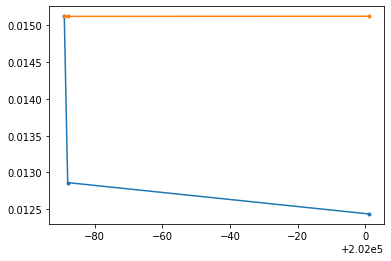

In [2483]:
train = train.join(y_train)
train1 = br_correction(train, index_month.upper(), target, correct = True, random_state = 42, alpha = 0)

In [2484]:
y_train = train1[target]
train1.drop(target, axis = 1, inplace = True)

In [2485]:
attribute_list_model = attributes_list_new(train1, list_of_columns_no_sys, high_outs+low_outs)

[0.99 0.01]
Number of finished repetitions: 0 | time:  03.07.2020 13:24:02
Number of finished repetitions: 100 | time:  03.07.2020 13:24:16


In [2486]:
len(C)*len(CC)

1

In [2487]:
from Filter_and_Grid_Search import lr_test_one_simple, lr_test_all_features

In [2488]:
new_meta_with_prepr = []

for combination in combination_preproc:
    outputs = list(combination)
    dicts = {}
    for position in range(len(combination)):
        dicts[list(params_preproc_grid.keys())[position]] = combination[position]
            
    non_outliers = attribute_list_model.loc[attribute_list_model[str(dicts['high_outlier'])+'%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
    cols_outliers = list_of_columns_no_sys.copy()
    
    for o in non_outliers:
        if o in cols_outliers:
            cols_outliers.remove(o)
                
    print('-'*20, dicts, non_outliers, '-'*20)
    i_meta = find_meta_params(train1, y_train, 
                            params_dictionary, params_to_model, pass_model, 
                            sort_by_var, list_of_vars_for_strat, n_fold, second_target, yeo_johnson, 
                            attribute_list = None, var_col = None, categorial_list = list_of_categories_sel,
                            cols_outlier = cols_outliers,
                            need_business = False, draw = False, draw_by_approval_rate = False,
                            simple_b_score = None, business_dict = None,
                            business_dict_sec = None,
                            scale = 'mean', median = 'median',
                            high_outlier = dicts['high_outlier'], 
                            low_outlier = dicts['low_outlier'], check_percentile = 1,
                            random_state = 241, task = 'binary', k_logs = 10,
                            cut_non_out_9999 = True)
    i_meta['high_outlier'] = dicts['high_outlier']
    i_meta['low_outlier'] = dicts['low_outlier']
        
    new_meta_with_prepr.append(i_meta)

-------------------- {'high_outlier': 99, 'low_outlier': 1} [] --------------------
{'C': [0.5], 'weight_0': array([0.01353745]), 'regularization': ['l2'], 'random_state': [241], 'solver': ['liblinear'], 'max_iter': [300]}
-------------------- 03.07.2020 13:29:35 0 -------------------- 
 Параметры: {'C': 0.5, 'class_weight': {0: 0.013537453621686667, 1: 1}, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear', 'max_iter': 300} 
 Среднее значение APS = 0.03805244892090909 
 Среднее значение AUC = 0.7304073148960933


In [2489]:
i_meta['weight'] = round(i_meta['weight_0'], 4)

In [2490]:
i_meta.sort_values(by = 'AUC', ascending = False)[['AUC', 'AUC_std', 'weight_0', 'C', 'high_outlier', 'low_outlier', 'Pre']]

,AUC,AUC_std,weight_0,C,high_outlier,low_outlier,Pre
0,0.730407,0.00998,0.013537,0.5,99,1,0.030181


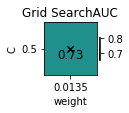

In [2491]:
plot_meta_2d(meta = i_meta, first_dimention = 'C', second_dimention = 'weight', b_best = 'AUC')

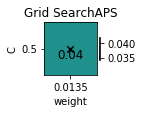

In [2492]:
plot_meta_2d(meta = i_meta, first_dimention = 'C', second_dimention = 'weight', b_best = 'APS')

In [2493]:
i_meta.to_csv(PATH +'Modeling_' + modeling + '/meta_file1.csv', sep='&')

In [2494]:
i_meta = pd.read_csv(PATH +'Modeling_' + modeling + '/meta_file1.csv', sep='&')

In [2495]:
list_of_columns = list(train1.columns)
list_of_columns_no_sys = list_of_columns.copy()
for i in necessary_fields_upper:
    if i in list_of_columns_no_sys:
        list_of_columns_no_sys.remove(i)

In [2496]:
attribute_list_model = attributes_list_new(train1, list_of_columns_no_sys, [1, 98, 99, 99.99])

[0.01   0.98   0.99   0.9999]
Number of finished repetitions: 0 | time:  03.07.2020 13:29:38
Number of finished repetitions: 100 | time:  03.07.2020 13:29:52


In [2497]:
non_outliers = attribute_list_model.loc[attribute_list_model['99%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
cols_outliers = list_of_columns_no_sys.copy()
    
for o in non_outliers:
    if o in cols_outliers:
        cols_outliers.remove(o)

In [2498]:
non_outliers

[]

In [2499]:
attribute_list_model['right_border'] = attribute_list_model['99%']
attribute_list_model['left_border'] = attribute_list_model['1%']

In [2500]:
attribute_list_model.loc[attribute_list_model['attribute'].isin(non_outliers), 'right_border'] = attribute_list_model['99.99%']

In [2501]:
attribute_list_model.to_csv(PATH+'Modeling_' + modeling + '/attribute_list_model_bef_pvalue.csv')

In [2502]:
oot1 = oot[train1.columns].copy()

In [2503]:
X_1_2, X_2_2, y_1_2, y_2, preproc_before_pvalue = data_preprocessing(train1, 
                                                                     y_train, 
                                                                            test, 
                                                                     y_test, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = attribute_list_model, 
                                                       var_col = 'attribute',
                                                       scale = 'mean', median = 'val_mediana', check_percentile = 5,
                                                   high_outlier = 'right_border', low_outlier = 'left_border', 
                                                       cols_outlier = cols_outliers, 
                                             cut_non_out_9999 = True)

X_3_2 = data_preprocessing_test(oot1, y_oot, necessary_fields_upper, categorial_list = list_of_categories_sel, 
                                drop_technical = True,
                            attribute_list = attribute_list_model, var_col = 'attribute',
                        median = 'val_mediana',
                      high_outlier = 'right_border', low_outlier = 'left_border', scale = preproc_before_pvalue, 
                                yeo_johnson = None, cols_outlier = cols_outliers)

In [2504]:
X_1_2.shape

(303764, 119)

In [2505]:
params_dict = {'weight_0':'class_weight', 'C': 'C', 'max_iter': 'max_iter'}
other_hyps = {'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear' }
pass_model = LogisticRegression

In [2506]:
X_1_2.columns

Index(['C_COUNTOFGP', 'PTI_FINAL_AD', 'BALCMTOBAL03AGO_B',
       'C_SCHEDULE2FACTPAY12M_ACTIVE', 'BALCMTOBAL06AGO_B',
       'C_SUMOFPAYMENTSL1M2TD', 'PTI_AD', 'PAYCMTOBALCM_O', 'MAXPTIEVER_O',
       'R_CNT_ALL_GP_REP',
       ...
       'INCTYPE_AP_1.0', 'CASHL12M_O', 'PRSEDULEVEL_4.0', 'CLOSED24_SUM_C',
       'TYPELASTCALL_24_VERY NEGATIVE', 'C_RPCALL2ANYPERSONCONTACTL6M',
       'CCDCREDITPOINT_AA_20.0', 'TRANSNUML3M_O', 'DLQ_PD2AMTOUTS_C_bin',
       'DISTANCE'],
      dtype='object', length=119)

In [2507]:
print(50*'-', 'By AUC', 50*'-')
auc_model_before_pvalue, auc_scores_before_pvalue, auc_test_pred_before_pvalue = train_model_receive_stats(X_1_2, 
                                                                 y_1_2, X_2_2, y_2, 
                                                                 meta = i_meta, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')

print(50*'-', 'By AUC oot', 50*'-')
auc_model_before_pvalue, auc_scores_oot_before_pvalue, auc_oot_pred_before_pvalue = train_model_receive_stats(X_1_2, y_1_2, 
                                                                                                              X_3_2, y_oot, 
                                                                 meta = i_meta, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')

-------------------------------------------------- By AUC --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
03.07.2020 13:30:31 start of logit fit
03.07.2020 13:31:19 end of logit fit
03.07.2020 13:31:19
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.22931640310229978
--------------------
AUC =  0.7197143061485504
AUC train = 0.7417929133758239
Gini =  0.43942861229710073
Gini train = 0.48358582675164774
Stability = 0.9086879473884486
Average precision score =  0.031279864915940675
---------- Treshold by F_score ----------
Accuracy =  0.9229925753692498
Score F1 =  0.06301237743128114
Precision =  0.037591100882240124
Recall =  0.19463753723932473
Approval rate =  0.06888260628319286
-------------------------------------------------- By AUC oot --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
03.07.2020 13:31:21 start of logit fit
03.07.2020 13:32:09 end of logit fit
03.07.2020 13:32:09
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.23478876979277485
--------------------
AUC =  0.7200939421980674
AUC train = 0.7417929133758239
Gini =  0.4401878843961349
Gini train = 0.48358582675164774
Stability = 0.9102580349655275
Average precision score =  0.026773416658521575
---------- Treshold by F_score ----------
Accuracy =  0.9248663565780101
Score F1 =  0.05879265091863517
Precision =  0.034346797511609566
Recall =  0.20395421436004163
Approval rate =  0.06832127100431609


In [2508]:
betas_before_pvalue = []

for i, v in enumerate(X_1_2.columns):
    betas_before_pvalue.append([v, auc_model_before_pvalue.coef_[0][i]])
    
betas_before_pvalue.append(['Intercept', auc_model_before_pvalue.intercept_[0]])

betas_before_pvalue = pd.DataFrame.from_records(betas_before_pvalue, columns = ['Variable', 'Coef'])
definition_2 = pd.read_csv(PATH + 'Selection/SandBox/definition_2.csv')
betas1_before_pvalue = pd.merge(betas_before_pvalue, definition_2.rename(columns = {'variable': 'Variable'}), 
                                how = 'left', on = 'Variable')
betas1_before_pvalue['abs_coef'] = abs(betas1_before_pvalue['Coef'])
betas1_before_pvalue.sort_values(by = 'abs_coef', ascending = False)
betas1_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/betas3_before_pvalue.csv', sep='&')
betas_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/betas_new3_before_pvalue.csv', sep='&')

In [2509]:
for_del = ['ScoreF1_b_best', 'Acc_b_best', 'Pre_b_best', 'Rec_b_best', 
               'Approval_rate_b_best', 'b_best']
for i in for_del:
    if i in auc_scores_before_pvalue.keys():
        auc_scores_before_pvalue.pop(i, None)
        
scores_before_pvalue = pd.DataFrame(auc_scores_before_pvalue)
scores_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/scores_test_before_pvalue.csv', sep='&')

for i in for_del:
    if i in auc_scores_oot_before_pvalue.keys():
        auc_scores_oot_before_pvalue.pop(i, None)
        
scores_oot_before_pvalue = pd.DataFrame(auc_scores_oot_before_pvalue)
scores_oot_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/scores_oot_before_pvalue.csv', sep='&')

In [2510]:
joblib.dump(auc_model_before_pvalue, PATH+ 'Modeling_' + modeling + '/auc_model_before_pvalue2.dat')
joblib.dump(preproc_before_pvalue, PATH+ 'Modeling_' + modeling + '/preproc_before_pvalue2.dat')

['D:/Share/01 -Risk Desc Science/CRM/Branch_2019/Modeling_experiment/preproc_before_pvalue2.dat']

In [2511]:
from Filter_and_Grid_Search import lr_test_one_simple, lr_test_all_features

In [ ]:
p_values2 = lr_test_all_features(auc_model_before_pvalue, LogisticRegression, X_1_2, y_train, 
                                 class_weight = auc_model_before_pvalue.get_params()['class_weight'],
                                 whole_model = True)
p_values2.sort_values(by = 'p_value', ascending = False, inplace = True)

In [ ]:
p_values2.to_csv(PATH + 'Modeling_' + modeling + '/p_values2.csv', sep = '&')

In [2512]:
p_values2 = pd.read_csv(PATH + 'Modeling_' + modeling + '/p_values2.csv', sep = '&')
p_values2.sort_values(by = 'p_value', ascending = False, inplace = True)

In [2513]:
del_vars = p_values2.loc[p_values2['p_value'] > 0.05, 'Variable'].to_list()
if 'Intercept' in del_vars:
        del_vars.remove('Intercept')

In [2514]:
len(del_vars)

82

### Final train (selection with p-value)

In [2515]:
train2 = train1.drop(del_vars, axis = 1)
test2 = test.drop(del_vars, axis = 1)

In [2516]:
list_of_columns_no_sys2 = list_of_columns_no_sys.copy()

for i in list_of_columns_no_sys:
    if i not in train2.columns.to_list():
        list_of_columns_no_sys2.remove(i)
        
attribute_list_model = attributes_list_new(train2, list_of_columns_no_sys2, high_outs+low_outs)

non_outliers = attribute_list_model.loc[attribute_list_model['99%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
cols_outliers = list_of_columns_no_sys2.copy()
    
for o in non_outliers:
    if o in cols_outliers:
        cols_outliers.remove(o)

[0.99 0.01]
Number of finished repetitions: 0 | time:  03.07.2020 13:32:12


In [2517]:
C = [0.5]
CC  = [1]
w = np.multiply(CC, w_b)
print(C)
print(w_b)
print(w)

[0.5]
0.013537453621686667
[0.01353745]


In [2518]:
len(C)*len(CC)

1

In [2519]:
params_dictionary = {'C': C,
                     'weight_0': w,
                     'regularization': 'l2', 'random_state': 241, 
                    'solver': 'liblinear', 'max_iter':  [300]}
params_to_model = {'C': 'C', 'weight_0': 'class_weight', 'regularization':'penalty', 'random_state': 'random_state',
                  'solver': 'solver', 'max_iter': 'max_iter'}
pass_model = LogisticRegression

sort_by_var = sort_by_var.upper()
list_of_vars_for_strat = ['MONTH_CALL']
second_target = None
yeo_johnson = False
n_fold = 5
simple_b_score = simple_b_score_crm
business_dictionary = {'m_s': 15900, 'k': 47, 'c': 1}
high_outs = [99]
low_outs = [1]
params_preproc_grid = {'high_outlier': high_outs, 'low_outlier': low_outs}
combination_preproc = list(itertools.product(*params_preproc_grid.values()))

In [2520]:
new_meta_with_prepr2 = []

for combination in combination_preproc:
    outputs = list(combination)
    dicts = {}
    for position in range(len(combination)):
        dicts[list(params_preproc_grid.keys())[position]] = combination[position]
            
    non_outliers = attribute_list_model.loc[attribute_list_model[str(dicts['high_outlier'])+'%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
    cols_outliers = list_of_columns_no_sys.copy()
    
    for o in non_outliers:
        if o in cols_outliers:
            cols_outliers.remove(o)
                
    print('-'*20, dicts, non_outliers, '-'*20)
    i_meta2 = find_meta_params(train2, y_train, 
                            params_dictionary, params_to_model, pass_model, 
                            sort_by_var, list_of_vars_for_strat, n_fold, second_target, yeo_johnson, 
                            attribute_list = None, var_col = None, categorial_list = list_of_categories_sel,
                            cols_outlier = cols_outliers,
                            need_business = False, draw = False, draw_by_approval_rate = False,
                            simple_b_score = None, business_dict = business_dictionary,
                            business_dict_sec = None,
                            scale = 'mean', median = 'median',
                            high_outlier = dicts['high_outlier'], 
                            low_outlier = dicts['low_outlier'], check_percentile = 1,
                            random_state = 241, task = 'binary', k_logs = 10,
                            cut_non_out_9999 = True)
    i_meta2['high_outlier'] = dicts['high_outlier']
    i_meta2['low_outlier'] = dicts['low_outlier']
        
    new_meta_with_prepr2.append(i_meta2)

-------------------- {'high_outlier': 99, 'low_outlier': 1} [] --------------------
{'C': [0.5], 'weight_0': array([0.01353745]), 'regularization': ['l2'], 'random_state': [241], 'solver': ['liblinear'], 'max_iter': [300]}
-------------------- 03.07.2020 13:33:25 0 -------------------- 
 Параметры: {'C': 0.5, 'class_weight': {0: 0.013537453621686667, 1: 1}, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear', 'max_iter': 300} 
 Среднее значение APS = 0.03727370866654993 
 Среднее значение AUC = 0.7305510504736719


In [2521]:
i_meta2['weight'] = round(i_meta2['weight_0'], 5)

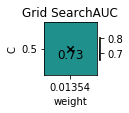

In [2522]:
plot_meta_2d(meta = i_meta2, first_dimention = 'C', second_dimention = 'weight', b_best = 'AUC')

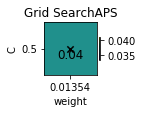

In [2523]:
plot_meta_2d(meta = i_meta2, first_dimention = 'C', second_dimention = 'weight', b_best = 'APS')

In [2524]:
i_meta2.to_csv(PATH +'Modeling_' + modeling + '/meta_file_after_pvalue.csv', sep='&')

In [2525]:
i_meta2 = pd.read_csv(PATH +'Modeling_' + modeling + '/meta_file_after_pvalue.csv', sep='&')

In [2526]:
train3 = train2.copy()
test3 = test2.copy()
list_of_columns_no_sys3 = list_of_columns_no_sys.copy()

for i in list_of_columns_no_sys:
    if i not in train3.columns.to_list():
        list_of_columns_no_sys3.remove(i)

attribute_list_model = attributes_list_new(train3, list_of_columns_no_sys3, [1, 98, 99, 99.99])

non_outliers = attribute_list_model.loc[attribute_list_model['99%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
cols_outliers = list_of_columns_no_sys.copy()
    
for o in non_outliers:
    if o in cols_outliers:
        cols_outliers.remove(o)
        
attribute_list_model['right_border'] = attribute_list_model['99%']
attribute_list_model['left_border'] = attribute_list_model['1%']
attribute_list_model.loc[attribute_list_model['attribute'].isin(non_outliers), 
                         'right_border'] = attribute_list_model['99.99%']

attribute_list_model.to_csv(PATH+'Modeling_' + modeling + '/attribute_list_model_after_pvalue2.csv')

[0.01   0.98   0.99   0.9999]
Number of finished repetitions: 0 | time:  03.07.2020 13:33:27


In [2527]:
oot1 = oot[list(train3.columns)]

In [2528]:
X_1_22, X_2_22, y_1_2, y_2, preproc2 = data_preprocessing(train3,
                                                          y_train, 
                                                        test3, 
                                                          y_test, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = attribute_list_model, 
                                                       var_col = 'attribute',
                                                       scale = 'mean', median = 'val_mediana', check_percentile = 5,
                                                   high_outlier = 'right_border', low_outlier = 'left_border', 
                                                       cols_outlier = cols_outliers, 
                                             cut_non_out_9999 = True)

X_3_2 = data_preprocessing_test(oot1, y_oot, necessary_fields_upper, categorial_list = list_of_categories_sel, 
                                drop_technical = True,
                            attribute_list = attribute_list_model, var_col = 'attribute',
                        median = 'val_mediana',
                      high_outlier = 'right_border', low_outlier = 'left_border', scale = preproc2, 
                                yeo_johnson = None, cols_outlier = cols_outliers)

In [2529]:
X_1_22.shape, X_3_2.shape

((303764, 37), (167049, 37))

In [2530]:
params_dict = {'weight_0':'class_weight', 'C': 'C', 'max_iter': 'max_iter'}
other_hyps = {'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear' }
pass_model = LogisticRegression

In [2531]:
print(50*'-', 'By AUC test', 50*'-')
auc_model, auc_scores, auc_test_pred = train_model_receive_stats(X_1_22, 
                                                                 y_1_2, X_2_22, y_2, 
                                                                 meta = i_meta2, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')


print(50*'-', 'By AUC oot', 50*'-')
auc_model, auc_scores_oot, auc_oot_pred = train_model_receive_stats(X_1_22, y_1_2, X_3_2, y_oot, 
                                                                 meta = i_meta2, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')

-------------------------------------------------- By AUC test --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
03.07.2020 13:33:38 start of logit fit
03.07.2020 13:33:47 end of logit fit
03.07.2020 13:33:47
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.23214074579935887
--------------------
AUC =  0.7127717542800833
AUC train = 0.7340919338452988
Gini =  0.42554350856016665
Gini train = 0.4681838676905976
Stability = 0.9089239034639055
Average precision score =  0.031018228794468958
---------- Treshold by F_score ----------
Accuracy =  0.9206277908420747
Score F1 =  0.06329903336451513
Precision =  0.037543924542260035
Recall =  0.2015888778550149
Approval rate =  0.071432346024784
-------------------------------------------------- By AUC oot --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
03.07.2020 13:33:49 start of logit fit
03.07.2020 13:33:57 end of logit fit
03.07.2020 13:33:58
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.23869756850897678
--------------------
AUC =  0.7166157235253108
AUC train = 0.7340919338452988
Gini =  0.43323144705062155
Gini train = 0.4681838676905976
Stability = 0.9253446710746672
Average precision score =  0.026605678588485008
---------- Treshold by F_score ----------
Accuracy =  0.9219510443043658
Score F1 =  0.05998558038932949
Precision =  0.03481754268496819
Recall =  0.21644120707596254
Approval rate =  0.07152392411807314


In [2532]:
joblib.dump(auc_model, PATH+ 'Modeling_' + modeling + '/auc_model2.dat')
joblib.dump(preproc2, PATH+ 'Modeling_' + modeling + '/preproc2.dat')

['D:/Share/01 -Risk Desc Science/CRM/Branch_2019/Modeling_experiment/preproc2.dat']

In [2533]:
auc_tests = pd.DataFrame(auc_test_pred)
auc_tests.rename(columns = {0: 'prediction'}, inplace = True)

Text(0.5, 1.0, 'Histograms 0 class')

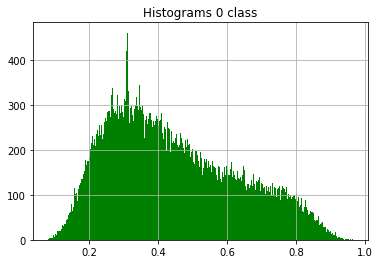

In [2534]:
auc_tests.loc[y_2 == 0, 'prediction'].hist(bins = 500, color = 'green')
plt.title('Histograms 0 class')

Text(0.5, 1.0, 'Histograms 1 class')

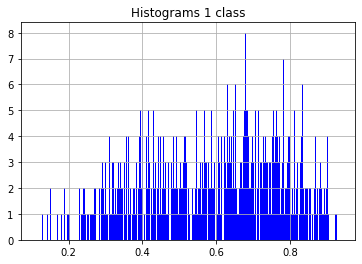

In [2535]:
auc_tests.loc[y_2 == 1, 'prediction'].hist(bins = 500, color = 'blue')
plt.title('Histograms 1 class')

In [2536]:
y_2.value_counts()

0    74687
1     1007
Name: GOOD_FLAG, dtype: int64

In [2537]:
X_1_22.shape

(303764, 37)

In [2538]:
betas = []

for i, v in enumerate(X_1_22.columns):
    betas.append([v, auc_model.coef_[0][i]])
    
betas.append(['Intercept', auc_model.intercept_[0]])

betas = pd.DataFrame.from_records(betas, columns = ['Variable', 'Coef'])
definition_2 = pd.read_csv(PATH + 'Selection/SandBox/definition_2.csv')
betas1 = pd.merge(betas, definition_2.rename(columns = {'variable': 'Variable'}), how = 'left', on = 'Variable')
betas1['abs_coef'] = abs(betas1['Coef'])
betas1.sort_values(by = 'abs_coef', ascending = False)
betas1.to_csv(PATH +'Modeling_' + modeling + '/betas3.csv', sep='&')
betas.to_csv(PATH +'Modeling_' + modeling + '/betas_new3.csv', sep='&')

In [2539]:
for_del = ['ScoreF1_b_best', 'Acc_b_best', 'Pre_b_best', 'Rec_b_best', 
               'Approval_rate_b_best', 'b_best']
for i in for_del:
    if i in auc_scores.keys():
        auc_scores.pop(i, None)
        
scores = pd.DataFrame(auc_scores)
scores.to_csv(PATH +'Modeling_' + modeling + '/scores_test.csv', sep='&')

for i in for_del:
    if i in auc_scores_oot.keys():
        auc_scores_oot.pop(i, None)
        
scores_oot = pd.DataFrame(auc_scores_oot)
scores_oot.to_csv(PATH +'Modeling_' + modeling + '/scores_oot.csv', sep='&')

In [2540]:
oot2 = oot.join(y_oot)
oot2 = oot2.join(pd.Series(auc_oot_pred, name='score'))
oot2.to_csv(PATH +'Modeling_' + modeling + '/oot_with_scores.csv', sep='&')

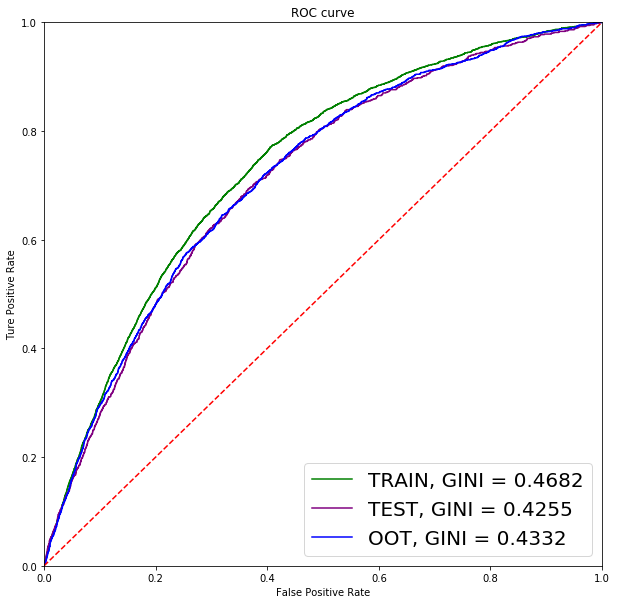

In [2541]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = auc_model

y_pred_train = clf.predict_proba(X_1_22)[:,1]
y_pred_test = clf.predict_proba(X_2_22)[:,1]
y_pred_oot = clf.predict_proba(X_3_2)[:,1]

fpr_train, tpr_train, _ = metrics.roc_curve(y_1_2, y_pred_train)
fpr_test, tpr_test, _ = metrics.roc_curve(y_2, y_pred_test)
fpr_oot, tpr_oot, _ = metrics.roc_curve(y_oot, y_pred_oot)
gini_train = 2 * metrics.auc(fpr_train,tpr_train) - 1
gini_test = 2 * metrics.auc(fpr_test,tpr_test) - 1
gini_oot = 2 * metrics.auc(fpr_oot,tpr_oot) - 1

plt.figure(figsize = (10, 10))
plt.title('ROC curve')

plt.plot(fpr_train, tpr_train, label = 'TRAIN, GINI = %0.4f'%gini_train, color = 'green')
plt.plot(fpr_test, tpr_test, label = 'TEST, GINI = %0.4f'%gini_test, color = 'purple')
plt.plot(fpr_oot, tpr_oot, label = 'OOT, GINI = %0.4f'%gini_oot, color = 'blue')

plt.legend(loc = 'lower right', fontsize=20)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Ture Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

### Lightgbm

In [2547]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier

oot_gbm = oot[list(train3.columns)]

In [2548]:
train_lgbm_data, test_lgbm_data, y_1_2, y_2 = data_preprocessing(train3,
                                                          y_train, 
                                                        test3, 
                                                          y_test, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = None, 
                                                       var_col = None,
                                                       scale = False, median = 'median', check_percentile = 5,
                                                   high_outlier = None, low_outlier = None, 
                                                       cols_outlier = [], 
                                             cut_non_out_9999 = False)

train_lgbm_data, oot_lgbm_data, y_1_2, y_3 = data_preprocessing(train3,
                                                          y_train, 
                                                        oot_gbm, 
                                                          y_oot, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = None, 
                                                       var_col = None,
                                                       scale = False, median = 'median', check_percentile = 5,
                                                   high_outlier = None, low_outlier = None, 
                                                       cols_outlier = [], 
                                             cut_non_out_9999 = False)

In [2549]:
params_lgbm = {
    'boosting_type': 'gbdt',
    'max_depth': 3,
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'verbose': 0,
    'n_estimators': 100,
    'class_weight': {0: w_b, 1: 1},
    'random_state': 241, 
    'n_jobs': 5}

In [2550]:
lightgbm_class = LGBMClassifier(**params_lgbm)
from datetime import datetime
print('Starting training...', datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S"))
# train
gbm = lightgbm_class.fit(train_lgbm_data, y_1_2)
print('Ending training...', datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S"))

y_train_pred = gbm.predict_proba(train_lgbm_data)[:, 1]
y_test_pred = gbm.predict_proba(test_lgbm_data)[:, 1]
y_oot_pred = gbm.predict_proba(oot_lgbm_data)[:, 1]

print('gini train = ', roc_auc_score(y_1_2, y_train_pred)*2-1, 
      'average precision score train = ', average_precision_score(y_train, y_train_pred))

print('gini test = ', roc_auc_score(y_2, y_test_pred)*2-1, 
      'average precision score test = ', average_precision_score(y_test, y_test_pred))

print('gini oot = ', roc_auc_score(y_3, y_oot_pred)*2-1, 
      'average precision score oot = ', average_precision_score(y_oot, y_oot_pred))

Starting training... 03.07.2020 13:34:29
Ending training... 03.07.2020 13:34:32
gini train =  0.5387610045607387 average precision score train =  0.05205637086964523
gini test =  0.4353446503234706 average precision score test =  0.03412913708684589
gini oot =  0.4525568964680524 average precision score oot =  0.03160467285342586


In [2551]:
scores_lightgbm = pd.DataFrame()

scores_lightgbm['gini_train'] = [roc_auc_score(y_1_2, y_train_pred)*2-1]
scores_lightgbm['gini_test'] = [roc_auc_score(y_2, y_test_pred)*2-1]
scores_lightgbm['gini_oot'] = [roc_auc_score(y_3, y_oot_pred)*2-1]
scores_lightgbm['APS_train'] = [average_precision_score(y_train, y_train_pred)]
scores_lightgbm['APS_test'] = [average_precision_score(y_test, y_test_pred)]
scores_lightgbm['APS_oot'] = [average_precision_score(y_oot, y_oot_pred)]

In [2552]:
scores_lightgbm

,gini_train,gini_test,gini_oot,APS_train,APS_test,APS_oot
0,0.538761,0.435345,0.452557,0.052056,0.034129,0.031605


In [2553]:
scores_lightgbm.to_csv(PATH+ 'Modeling_' + modeling + '/scores_lightgbm.csv', sep='&')

# Experiment 2

In [12]:
all_columns = pd.read_csv(PATH + 'Selection/SandBox/selected_features_forest_definition.csv', sep = '&')

In [13]:
data1 = pd.read_csv(PATH + 'Data Sets/' +  train_data, sep = '&', encoding = 'cp1251')
data1.columns = [col.upper() for col in data1.columns]

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1195) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data = turn_variables_with_values(data1, all_columns)

In [15]:
columns = data.columns

In [16]:
categorial_data = pd.read_csv(PATH+'Selection/SandBox/categorial_data.csv', sep='&')
sys_data = pd.read_csv(PATH+'Selection/SandBox/sys_data.csv', sep='&')
del_data = pd.read_csv(PATH+'Selection/SandBox/del_data.csv', sep='&')
changes = pd.read_csv(PATH + 'Selection/SandBox/changes.csv', sep = '&')

In [17]:
categorial_columns = categorial_data['variable'].to_list()
COL_SYS = sys_data['variable'].to_list()
COL_DEL = del_data['variable'].to_list()

In [18]:
necessary_fields_upper

['GOOD_FLAG', 'MONTH_CALL', 'CIF_ID']

In [19]:
gc.collect()

60

In [20]:
columns = list(data.columns)

In [21]:
file_name = PATH + 'Selection/excel/12. COR_NUM_binned.xlsx'
correlation_num1 = pd.read_excel(file_name)
file_name = PATH + 'Selection/excel/12. COR_CAT_binned.xlsx'
correlation_cat1 = pd.read_excel(file_name)
definition_2 = pd.read_csv(PATH + 'Selection/SandBox/definition_2.csv')

In [22]:
correlation_cat1.set_index('Unnamed: 0', inplace = True)
correlation_num1.set_index('Unnamed: 0', inplace = True)

In [23]:
correlation_num1.head()

,FUNDEDAMT_O,COUNTPAIDOUT_O,MAXMOBOPENEVER_ALL_O,MOBC_ALL_O,COUNTOFPAYMENTSL24M_O,COUNTOFPAYMENTSL12M_O,COUNTOFPAYMENTSL6M_O,COUNTOFPAYMENTSL3M_O,COUNTOFPAYMENTSCM_O,PAYAMTCM_O,...,C_SCHEDULE2FACTPAY12M,C_SCHEDULE2FACTPAY6M,C_SCHEDULE2FACTPAY1M,C_SCHEDULE2FACTPAY12M_ACTIVE,C_SCHEDULE2FACTPAY6M_ACTIVE,C_COUNTDAYSTASKL3M,C_COUNTOPERATORCALLL3M,AGE,EMPINCOMEAMT,CCDLOANRATE
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
FUNDEDAMT_O,1.000000,0.631588,0.332429,0.520042,0.467620,0.368827,0.298293,0.221677,0.124759,0.249152,...,0.038479,0.037526,0.001431,0.144804,0.094340,-0.031677,-0.041479,-0.018481,0.007235,0.127727
COUNTPAIDOUT_O,0.631588,1.000000,0.462896,0.737957,0.506750,0.353684,0.243662,0.152241,0.034977,0.102080,...,0.024838,0.015454,-0.005084,0.121531,0.077455,-0.050530,-0.074673,0.051403,0.007325,0.147292
MAXMOBOPENEVER_ALL_O,0.332429,0.462896,1.000000,0.872276,0.580076,0.420351,0.284050,0.172020,0.031850,0.022322,...,0.006390,-0.005149,0.008801,0.029232,0.020020,-0.049015,-0.086279,0.063419,0.007278,0.366514
MOBC_ALL_O,0.520042,0.737957,0.872276,1.000000,0.660897,0.488577,0.351970,0.240561,0.089038,0.050016,...,0.010075,0.000102,0.011878,0.058490,0.040514,-0.040299,-0.072178,0.074406,0.012370,0.304397
COUNTOFPAYMENTSL24M_O,0.467620,0.506750,0.580076,0.660897,1.000000,0.883232,0.702675,0.533400,0.273235,0.074207,...,0.009398,0.008473,0.021598,0.079123,0.061805,-0.045098,-0.070718,0.028171,0.001842,0.280343


In [24]:
result_tab_cat1, non_doubles_cat1, col_doubles_cat1, double_dic_cat1 = find_doubles_corr(data, columns, 
                                  correlation_cat1, definition = definition_2, lvl = 0.70, light_unstable = None)
result_tab_num1, non_doubles_num1, col_doubles_num1, double_dic_num1 = find_doubles_corr(data, columns, 
                                  correlation_num1, definition = definition_2, lvl = 0.70, light_unstable = None)

Порог = 0.7 Осталось фичей = 122 Коррелир.фичей = 336
Порог = 0.7 Осталось фичей = 269 Коррелир.фичей = 199


In [25]:
result_tab_cat1, non_doubles_cat1, col_doubles_cat1, double_dic_cat1 = find_doubles_corr(data, columns, 
                                  correlation_cat1, definition = definition_2, lvl = 0.50, light_unstable = None)
result_tab_num1, non_doubles_num1, col_doubles_num1, double_dic_num1 = find_doubles_corr(data, columns, 
                                  correlation_num1, definition = definition_2, lvl = 0.50, light_unstable = None)

Порог = 0.5 Осталось фичей = 80 Коррелир.фичей = 378
Порог = 0.5 Осталось фичей = 138 Коррелир.фичей = 330


In [26]:
non_doubles1 = list(set(non_doubles_cat1 + non_doubles_num1))

In [27]:
len(non_doubles1)

218

## 2.1 Gini Scheme 

In [28]:
COL_DEL1 = []

for i in data.columns:
    if i not in non_doubles1 + necessary_fields_upper:
        COL_DEL1.append(i)

In [29]:
data.drop(COL_DEL1, axis = 1, inplace = True)

In [30]:
for i in necessary_fields_upper:
    if i not in list(data.columns):
        print(i)

In [31]:
data_prepr, scale = data_preprocessing_train(data, COL_TRG, 
                                technical_values = [COL_SYS+necessary_fields_upper], 
                                drop_technical = False,
                                yeo_johnson = False, 
                                attribute_list = None, 
                                var_col = None,
                                scale = 'mean', 
                                median = 'median',
                                high_outlier = 99, 
                                low_outlier = 1, 
                                cols_outlier = None)

data = data_preprocessing_train(data, COL_TRG, 
                                technical_values = [COL_SYS+necessary_fields_upper], 
                                drop_technical = False,
                                yeo_johnson = False, 
                                attribute_list = None, 
                                var_col = None,
                                scale = False, 
                                median = 'median',
                                high_outlier = None, 
                                low_outlier = None, 
                                cols_outlier = None)


In [32]:
if 'Unnamed: 0' in data_prepr.columns.to_list():
    data_prepr.drop('Unnamed: 0', axis = 1, inplace = True)
    
if 'Unnamed: 0.1' in data_prepr.columns.to_list():
    data_prepr.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [33]:
data_prepr.head()

,CIF_ID,MAXPTIEVER_ACTUAL_O,MAXPTIEVER_O,SUMPAYCMTOMAXPAY_O,TRANSNUML3M_O,CASHL1M_O,CASHL12M_O,SUMPAYMENTCMTOLIMITCARD_O,SUMPAYMENTCMTOLIMIT_O,SUMPAYMENTL3MTOLIMIT_O,...,DISTANCE_bin,COUNTVERYNEGATIVE_12_bin,COUNTVERYPOSITIVE_24_bin,COUNTIN_24_bin,SUMONLYPOS_24_bin,C_DAYSBETWLASTDELINQS12M_bin,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,C_DAYSSINCELASTTPC12M_bin,C_COUNTIN2COUNTOUTALLL12M_CL_bin,EMPINCOMEAMT_bin
0,-1.934731,-0.514464,-0.569577,1.371029,-0.145053,-0.068704,-0.143452,-0.200204,-0.060802,0.212627,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.934731,-0.476727,-0.529924,-0.270407,-0.145053,-0.068704,-0.143452,-0.200204,-0.329695,-0.377394,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.934731,-0.483769,-0.573282,-0.853356,-0.145053,-0.068704,-0.143452,-0.200204,-0.340178,-0.406303,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,-1.934731,-0.483769,-0.573282,-0.853356,-0.145053,-0.068704,-0.143452,-0.200204,-0.340178,-0.406303,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,-1.934731,-0.476727,-0.529924,-0.270407,-0.145053,-0.068704,-0.143452,-0.200204,-0.329695,-0.377394,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
target = target.upper()

In [35]:
X_1_2, X_2_2, y_1, y_2 = stratified_split(data_prepr, target, list_of_vars_for_strat_upper, sort_by_var_upper, 
                                      size_of_test = 0.5, drop_technical = True, random_state = 241)

In [36]:
X_1_2.shape, X_1_2.dropna().shape

((151718, 218), (151718, 218))

In [37]:
once_rows = sum(data[target])
second_rows = (len(data[target]) - sum(data[target]))
y_unique = sorted(data[target].unique())
all_rows = len(data[target])

once_rows_share = once_rows/all_rows
second_rows_share = second_rows/all_rows
second_rows_share/once_rows_share

if once_rows < second_rows:
    w_b = once_rows/second_rows
else:
    w_b = second_rows/once_rows

In [38]:
once_rows_share, second_rows_share

(0.013356638744146165, 0.9866433612558538)

In [39]:
w_b

0.013537453621686667

In [40]:
print(30*'-', 'LogisticRegression', 30*'-')

logit_params = {'class_weight': {0: 2*w_b, 1:1}}
print(20*'-', 'First sample', 20*'-')

tm = datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S")
print (20*'-', 'time: ' , tm, 20*'-')

first_logit_res = calculate_metrics_for_several_vars(X_1_2, y_1, X_2_2, y_2, list(X_1_2.columns), 
                                                     LogisticRegression, logit_params,
                                                     use_metrics = [metrics.roc_auc_score,
                                                                   metrics.average_precision_score],
                                                    names = ['roc_auc_score', 'average_precision_score'], 
                                                    task = 'binary', 
                                                     integral_metrics = [metrics.roc_auc_score,
                                                                         metrics.average_precision_score],
                                                    n_jobs = 3)

print(20*'-', 'Second sample', 20*'-')

tm = datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S")
print (20*'-', 'time: ' , tm, 20*'-')

sec_logit_res = calculate_metrics_for_several_vars(X_2_2, y_2, X_1_2, y_1, list(X_2_2.columns), 
                                                     LogisticRegression, logit_params,
                                                     use_metrics = [metrics.roc_auc_score,
                                                                   metrics.average_precision_score],
                                                    names = ['roc_auc_score', 'average_precision_score'], 
                                                    task = 'binary', 
                                                     integral_metrics = [metrics.roc_auc_score,
                                                                         metrics.average_precision_score],
                                                    n_jobs = 3)

print(30*'-', 'DecisionTreeClassifier', 30*'-')

tree_params = {'class_weight': {0: 2*w_b, 1:1}, 'max_depth': 4}

print(20*'-', 'First sample', 20*'-')
tm = datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S")
print (20*'-', 'time: ' , tm, 20*'-')

first_tree_res = calculate_metrics_for_several_vars(X_1_2, y_1, X_2_2, y_2, list(X_1_2.columns), 
                                                     DecisionTreeClassifier, tree_params,
                                                     use_metrics = [metrics.roc_auc_score,
                                                                   metrics.average_precision_score],
                                                    names = ['roc_auc_score', 'average_precision_score'], 
                                                    task = 'binary', 
                                                     integral_metrics = [metrics.roc_auc_score,
                                                                         metrics.average_precision_score],
                                                    n_jobs = 3)


print(20*'-', 'Second sample', 20*'-')
tm = datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S")
print (20*'-', 'time: ' , tm, 20*'-')

sec_tree_res = calculate_metrics_for_several_vars(X_2_2, y_2, X_1_2, y_1, list(X_2_2.columns), 
                                                     DecisionTreeClassifier, tree_params,
                                                     use_metrics = [metrics.roc_auc_score,
                                                                   metrics.average_precision_score],
                                                    names = ['roc_auc_score', 'average_precision_score'], 
                                                    task = 'binary', 
                                                     integral_metrics = [metrics.roc_auc_score,
                                                                         metrics.average_precision_score],
                                                    n_jobs = 3)

------------------------------ LogisticRegression ------------------------------
-------------------- First sample --------------------
-------------------- time:  13.07.2020 15:44:21 --------------------
-------------------- Second sample --------------------
-------------------- time:  13.07.2020 15:45:04 --------------------
------------------------------ DecisionTreeClassifier ------------------------------
-------------------- First sample --------------------
-------------------- time:  13.07.2020 15:45:43 --------------------
-------------------- Second sample --------------------
-------------------- time:  13.07.2020 15:46:12 --------------------


In [41]:
first_logit_res1 = first_logit_res.pivot(index='Feature',columns='metric')['score']
sec_logit_res1 = sec_tree_res.pivot(index='Feature',columns='metric')['score']
first_logit_res1.reset_index(inplace = True)
sec_logit_res1.reset_index(inplace = True)

first_tree_res1 = first_tree_res.pivot(index='Feature',columns='metric')['score']
sec_tree_res1 = sec_tree_res.pivot(index='Feature',columns='metric')['score']
first_tree_res1.reset_index(inplace = True)
sec_tree_res1.reset_index(inplace = True)

In [42]:
logit_all = pd.merge(first_logit_res1, sec_logit_res1, on = 'Feature', suffixes=('_1', '_2'))
tree_all = pd.merge(first_tree_res1, sec_tree_res1, on = 'Feature', suffixes=('_1', '_2'))

In [43]:
tree_all = pd.merge(first_tree_res1, sec_tree_res1, on = 'Feature', suffixes=('_1', '_2'))

In [44]:
metr = ['Gini_score', 'average_precision_score']
for i in metr:
    logit_all[i] = (logit_all[i+'_1']+logit_all[i+'_2'])/2
    tree_all[i] = (tree_all[i+'_1']+tree_all[i+'_2'])/2

In [45]:
logit_all.sort_values(by = 'Gini_score', 
                                    ascending = False, inplace = True)

In [46]:
one_factor = logit_all['Feature'].to_list()

In [47]:
len(one_factor)

218

In [48]:
vif_del = []

In [51]:
vif = calculate_vif(data_prepr[one_factor])
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

13.07.2020 23:26:36 0 C_COUNTOFGP
14.07.2020 00:36:28 10 PDSGOODSCAT_MAX_AA_57.0
14.07.2020 01:52:27 20 PAYL3MTOSUMBALL3M_O
14.07.2020 03:06:02 30 R_SNCLASTOPCC_REP_bin
14.07.2020 04:21:49 40 DLQ_PD2AMTOUTS_C_bin
14.07.2020 05:22:52 50 DLQ_WRSTARR25E_C
14.07.2020 06:43:41 60 BALANCETOTOTALCURRENT_B
14.07.2020 07:42:11 70 FINALAPPROVE_AD_0.0
14.07.2020 08:24:36 80 UNUSEDLIMCCMIN_C
14.07.2020 09:03:46 90 PTI_FINAL_AD_bin
14.07.2020 09:30:51 100 PRSEDULEVEL_4.0
14.07.2020 09:48:25 110 TRANSSUML6MTOTRANSSUML24M_O
14.07.2020 10:03:37 120 EMPINCOMEAMT_bin
14.07.2020 10:26:39 130 SUMOVERDUE00PEVER_B
14.07.2020 10:49:52 140 C_COUNTALLSMS3M
14.07.2020 11:10:55 150 CCARDUTILZCURTOCCARDUTILZ06AGO_B
14.07.2020 11:17:00 160 C_COUNTNOTREADEMAIL3M
14.07.2020 11:24:18 170 EMPINDUSTRY_21.0
14.07.2020 11:41:47 180 CASHL3MTOPAYAMTL3M_O
14.07.2020 12:14:54 190 EMPINDUSTRY_6.0
14.07.2020 12:38:53 200 DISTANCE
14.07.2020 12:55:12 210 CASHCMTOBALANCE06_O


In [52]:
vif.head()

,Features,VIF
205,REFERCREDITANALYST_AD_0.0,38.561521
164,CDAAPPROVE_AD_0.0,31.527958
148,PRSDEPTENUM_AP_bin,23.561382
120,EMPINCOMEAMT_bin,22.493689
27,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,13.041410


In [53]:
vif_del = vif.loc[vif['VIF'] > 10, 'Features'].to_list()

In [ ]:
vif = vif.sort_values(by = 'VIF', ascending = False).reset_index()
while vif['VIF'][0] > 10:
    print(vif.head(5))
    c = vif.Features[0]
    vif_del.append(c)
    print('Delete ', c)
    vif = calculate_vif(data_prepr[[c for c in one_factor if c not in vif_del]])
    vif = vif.sort_values(by = 'VIF', ascending = False).reset_index()

In [54]:
vif.head()

,Features,VIF
205,REFERCREDITANALYST_AD_0.0,38.561521
164,CDAAPPROVE_AD_0.0,31.527958
148,PRSDEPTENUM_AP_bin,23.561382
120,EMPINCOMEAMT_bin,22.493689
27,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,13.041410


In [55]:
len(vif_del)

10

In [56]:
new_features_list = []
cols = ['new variable', 'genuine variable', 'rule', 'values']

for i in one_factor:
    if i in list(changes['new variable']):
        change = changes[changes['new variable'] == i]
        new_features_list.append([list(change['new variable'])[0], list(change['genuine variable'])[0], 
                                  list(change['rule'])[0], list(change['values'])[0]])
    else:
        new_features_list.append([i, i, 'Missing', np.nan])
        
for i in necessary_fields_upper:
    new_features_list.append([i, i, 'Missing', np.nan])
    
new_features_data = pd.DataFrame.from_records(new_features_list, columns = cols)
new_features_data_no_vif = new_features_data[~new_features_data['new variable'].isin(vif_del)]
new_features_data_no_vif_no_sys = new_features_data_no_vif[~new_features_data_no_vif['new variable'].isin(necessary_fields_upper)]

In [57]:
new_features_data.shape, new_features_data_no_vif.shape

((221, 4), (211, 4))

In [58]:
new_features_data.to_csv(PATH + 'Selection/SandBox/selected_features_one_factor.csv', sep = '&')
new_features_data_no_vif.to_csv(PATH + 'Selection/SandBox/selected_features_one_factor_vif.csv', sep = '&')
new_features_data_no_vif_no_sys.to_csv(PATH + 'Selection/SandBox/selected_features_one_factor_vif_no_sys.csv', sep = '&')

In [59]:
#new_features_data = pd.read_csv(PATH + 'Selection/SandBox/selected_features_one_factor.csv', sep = '&')
#new_features_data_no_vif= pd.read_csv(PATH + 'Selection/SandBox/selected_features_one_factor_vif.csv', sep = '&')
#new_features_data_no_vif_no_sys= pd.read_csv(PATH + 'Selection/SandBox/selected_features_one_factor_vif_no_sys.csv', 
                                             sep = '&')

In [60]:
modeling = 'one_factor'

In [61]:
selected_features = new_features_data_no_vif
sel_c = selected_features['genuine variable'].to_list()

In [62]:
gc.collect()

2563

In [63]:
train = pd.read_csv(PATH + 'Data Sets/' +  train_data, sep = '&', encoding = 'cp1251')
train.columns = [col.upper() for col in train.columns]

test = pd.read_csv(PATH + 'Data Sets/' +  test_data, sep = '&', encoding = 'cp1251')
test.columns = [col.upper() for col in test.columns]

oot = pd.read_csv(PATH + 'Data Sets/' +  oot_data, sep = '&', encoding = 'cp1251')
oot.columns = [col.upper() for col in oot.columns]

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1195) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
train = turn_variables_with_values(train, selected_features)
test = turn_variables_with_values(test, selected_features)
oot = turn_variables_with_values(oot, selected_features)

In [65]:
target = target.upper()

In [66]:
y_train = train[target]
y_test = test[target]
y_oot = oot[target]

train.drop(target, axis = 1, inplace = True)
test.drop(target, axis = 1, inplace = True)
oot.drop(target, axis = 1, inplace = True)

In [67]:
train.head()

,C_COUNTOFGP,PTI_FINAL_AD,NEGTOALL_2020_12,MAXPTIEVER_O,BALCMTOBAL03AGO_B,INQ_NMB_C,CCDLOANRATE,R_CNT_ALL_GP_REP,PTI_AD,BALCMTOBAL06AGO_B,...,CASHCMTOBALANCE06_O,C_PTPNB2PTPALLL12M,MAXDAYSINDELINQCURRENT_B,CASHCMTOAVGLIMITL6M_O,EMPTIMEINJOB_AP,C_UNSUCESSFUL2OUTBOUNDL12M,CNTR_AL_CNT_C,C_BROKENPTPSHAREALLL3M,MONTH_CALL,CIF_ID
0,0,NaN,1.0,0.353232,0.823748,46.0,NaN,0.0,0.40921,NaN,...,NaN,NaN,0.0,NaN,314.0,NaN,0.0,NaN,201911,1000000653
1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,201911,1000002153
2,0,0.16212,1.0,0.339517,0.920952,12.0,10.33,0.0,0.38788,NaN,...,NaN,NaN,0.0,NaN,180.0,NaN,0.0,NaN,201911,1000002599
3,0,NaN,0.9,0.339517,0.912640,11.0,10.33,0.0,NaN,0.808715,...,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,202001,1000002599
4,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,201911,1000003476


In [68]:
list_of_columns = selected_features['new variable'].to_list()
list_of_columns_no_sys = list_of_columns.copy()
for i in necessary_fields_upper:
    if i in list_of_columns_no_sys:
        list_of_columns_no_sys.remove(i)

In [69]:
len(list_of_columns_no_sys)

208

In [70]:
attribute_list_model = attributes_list_new(train, list_of_columns_no_sys, [0.01, 0.5, 1, 2, 5, 95, 97, 
                                                                           98, 99, 99.5, 99.99])

[1.000e-04 5.000e-03 1.000e-02 2.000e-02 5.000e-02 9.500e-01 9.700e-01
 9.800e-01 9.900e-01 9.950e-01 9.999e-01]
Number of finished repetitions: 0 | time:  14.07.2020 13:10:42
Number of finished repetitions: 100 | time:  14.07.2020 13:10:58
Number of finished repetitions: 200 | time:  14.07.2020 13:11:12


In [71]:
attribute_list_model[attribute_list_model['99%'] == attribute_list_model['1%']]

,attribute,type_val,count_dist,count_miss,moda_val,count_value_moda,count_val,mean,stand_d_val,min_val,...,2%,5%,val_mediana,95%,97%,98%,99%,99.5%,99.99%,max_val


In [72]:
list_of_categories_sel = attribute_list_model.loc[(attribute_list_model['count_dist'] == 2), 'attribute'].to_list() 

In [73]:
categorials_data_fin = pd.read_csv(PATH + 'Selection/SandBox/categories_fin.csv', sep = '&')

In [74]:
categorials_data_fin.head()

,Unnamed: 0,feature
0,0,TRANSNUMCMTOTRANSNUML3M_O_bin
1,1,R_CNT_ALL_GP_REP_bin
2,2,SUMPAYMENTL6MTOLIMITCARD_O_bin
3,3,SUMONLYPOS_24_bin
4,4,C_SCHEDULE2FACTPAY6M_bin


In [75]:
for i in list_of_columns_no_sys:
    if i in categorials_data_fin['feature'].to_list():
        list_of_categories_sel.append(i)

In [76]:
list_of_categories_sel

['PDSGOODSCAT_MAX_AA_57.0',
 'COUNTVERYNEGATIVE_12_bin',
 'UNUSEDLIMCCMAX_C_bin',
 'AMTOPNWBCC_MIN_C_bin',
 'R_SNCLASTOPCC_REP_bin',
 'TYPELASTCALL_24_NEGATIVE',
 'DLQ_WASDELAY_C_1.0',
 'COUNTIN_24_bin',
 'BP_CREDITCOUNT_AD_bin',
 'CCDCREDITPOINT_AA_22.0',
 'FINALAPPROVE_AD_0.0',
 'C_COUNTIN2COUNTOUTALLL12M_CL_bin',
 'COMBI_ISSUE_FLAG_AA_1.0',
 'BALCMTOBAL06AGO_B_bin',
 'TIME_SINCEL_30_C_bin',
 'OPENLYEARCCSUM_C_bin',
 'TYPELASTCALL_2020_12_VERY NEGATIVE',
 'TYPELASTCALL_24_VERY NEGATIVE',
 'PTI_FINAL_AD_bin',
 'SUMONLYPOS_24_bin',
 'C_COUNTALLSMS1M_bin',
 'BURAPPRRT_L3M_C_bin',
 'PRSEDULEVEL_4.0',
 'C_DAYSBETWLASTDELINQS12M_bin',
 'TYPELASTCALL_24_NEUTRAL',
 'INT_DUMMY_1',
 'COUNTVERYPOSITIVE_24_bin',
 'MONTHSSINCELAST00PTOMOB_B_bin',
 'R_AMT_NB_AVG_REP_bin',
 'TYPELASTCALL_2020_12_POSITIVE',
 'CANCEL_AD_0.0',
 'GENDER_AP_2.0',
 'C_OFFICEPAY1M_bin',
 'DISTANCE_bin',
 'RATING_AD_4.0',
 'RATING_AD_5.0',
 'PDSGOODSGROUP_MAX_AA_6.0',
 'PRSEDULEVEL_7.0',
 'TEL_WORK_FLAG_AP_0.0',
 'PRSEDULE

In [77]:
iqr_outliers = find_ouliers_iqr(train, necessary_fields_upper, mult = 1.5, check_percentile = 1)

In [78]:
once_rows = sum(y_train)
second_rows = (len(y_train) - sum(y_train))
y_unique = sorted(y_train.unique())
all_rows = len(y_train)

once_rows_share = once_rows/all_rows
second_rows_share = second_rows/all_rows
second_rows_share/once_rows_share

if once_rows < second_rows:
    w_b = once_rows/second_rows
else:
    w_b = second_rows/once_rows

In [79]:
once_rows_share, second_rows_share

(0.013356638744146165, 0.9866433612558538)

In [80]:
w_b

0.013537453621686667

In [88]:
C = [0.5]
CC  = [1]
w = np.multiply(CC, w_b)
print(C)
print(w_b)
print(w)

[0.5]
0.013537453621686667
[0.01353745]


In [89]:
from Filter_and_Grid_Search import simple_b_score_crm

In [90]:
help(simple_b_score_crm)

Help on function simple_b_score_crm in module Filter_and_Grid_Search:

simple_b_score_crm(_tn, _fp, _fn, _tp, m_s, k, c, pos_label=None, sample_weight=None)
    Функция в одну строчку, которая считает бизнес метрику по элементам confusion matrix



In [91]:
params_dictionary = {'C': C,
                     'weight_0': w,
                     'regularization': 'l2', 'random_state': 241, 
                    'solver': 'liblinear', 'max_iter':  [300]}
params_to_model = {'C': 'C', 'weight_0': 'class_weight', 'regularization':'penalty', 'random_state': 'random_state',
                  'solver': 'solver', 'max_iter': 'max_iter'}
pass_model = LogisticRegression

sort_by_var = sort_by_var.upper()
list_of_vars_for_strat = ['MONTH_CALL']
second_target = None
yeo_johnson = False
n_fold = 5
simple_b_score = simple_b_score_crm
business_dictionary = {'m_s': 15900, 'k': 47, 'c': 1}


In [92]:
high_outs = [99]
low_outs = [1]
params_preproc_grid = {'high_outlier': high_outs, 'low_outlier': low_outs}

In [93]:
combination_preproc = list(itertools.product(*params_preproc_grid.values()))

In [94]:
from Filter_and_Grid_Search import br_correction

Максимальный BR = 0.015122076827641096
Список срезов для выравнивания: [201911 202001 201912]
Максимальный BR = 0.015125009827816652


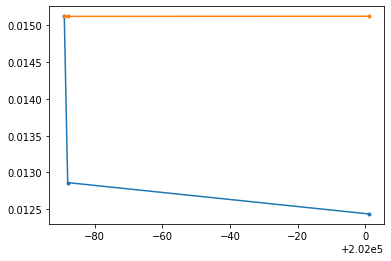

In [95]:
train = train.join(y_train)
train1 = br_correction(train, index_month.upper(), target, correct = True, random_state = 42, alpha = 0)

In [96]:
y_train = train1[target]
train1.drop(target, axis = 1, inplace = True)

In [97]:
attribute_list_model = attributes_list_new(train1, list_of_columns_no_sys, high_outs+low_outs)

[0.99 0.01]
Number of finished repetitions: 0 | time:  14.07.2020 13:12:35
Number of finished repetitions: 100 | time:  14.07.2020 13:13:03
Number of finished repetitions: 200 | time:  14.07.2020 13:13:21


In [98]:
len(C)*len(CC)

1

In [99]:
from Filter_and_Grid_Search import lr_test_one_simple, lr_test_all_features

In [100]:
new_meta_with_prepr = []

for combination in combination_preproc:
    outputs = list(combination)
    dicts = {}
    for position in range(len(combination)):
        dicts[list(params_preproc_grid.keys())[position]] = combination[position]
            
    non_outliers = attribute_list_model.loc[attribute_list_model[str(dicts['high_outlier'])+'%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
    cols_outliers = list_of_columns_no_sys.copy()
    
    for o in non_outliers:
        if o in cols_outliers:
            cols_outliers.remove(o)
                
    print('-'*20, dicts, non_outliers, '-'*20)
    i_meta = find_meta_params(train1, y_train, 
                            params_dictionary, params_to_model, pass_model, 
                            sort_by_var, list_of_vars_for_strat, n_fold, second_target, yeo_johnson, 
                            attribute_list = None, var_col = None, categorial_list = list_of_categories_sel,
                            cols_outlier = cols_outliers,
                            need_business = False, draw = False, draw_by_approval_rate = False,
                            simple_b_score = None, business_dict = None,
                            business_dict_sec = None,
                            scale = 'mean', median = 'median',
                            high_outlier = dicts['high_outlier'], 
                            low_outlier = dicts['low_outlier'], check_percentile = 1,
                            random_state = 241, task = 'binary', k_logs = 10,
                            cut_non_out_9999 = True)
    i_meta['high_outlier'] = dicts['high_outlier']
    i_meta['low_outlier'] = dicts['low_outlier']
        
    new_meta_with_prepr.append(i_meta)

-------------------- {'high_outlier': 99, 'low_outlier': 1} [] --------------------
{'C': [0.5], 'weight_0': array([0.01353745]), 'regularization': ['l2'], 'random_state': [241], 'solver': ['liblinear'], 'max_iter': [300]}
-------------------- 14.07.2020 13:27:04 0 -------------------- 
 Параметры: {'C': 0.5, 'class_weight': {0: 0.013537453621686667, 1: 1}, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear', 'max_iter': 300} 
 Среднее значение APS = 0.037582177361803595 
 Среднее значение AUC = 0.7299938827039076


In [101]:
i_meta['weight'] = round(i_meta['weight_0'], 4)

In [102]:
i_meta.sort_values(by = 'AUC', ascending = False)[['AUC', 'AUC_std', 'weight_0', 'C', 'high_outlier', 'low_outlier', 'Pre']]

,AUC,AUC_std,weight_0,C,high_outlier,low_outlier,Pre
0,0.729994,0.011521,0.013537,0.5,99,1,0.030132


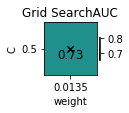

In [103]:
plot_meta_2d(meta = i_meta, first_dimention = 'C', second_dimention = 'weight', b_best = 'AUC')

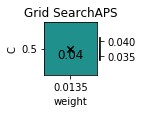

In [104]:
plot_meta_2d(meta = i_meta, first_dimention = 'C', second_dimention = 'weight', b_best = 'APS')

In [105]:
i_meta.to_csv(PATH +'Modeling_' + modeling + '/meta_file1.csv', sep='&')

In [106]:
i_meta = pd.read_csv(PATH +'Modeling_' + modeling + '/meta_file1.csv', sep='&')

In [107]:
list_of_columns = list(train1.columns)
list_of_columns_no_sys = list_of_columns.copy()
for i in necessary_fields_upper:
    if i in list_of_columns_no_sys:
        list_of_columns_no_sys.remove(i)

In [108]:
attribute_list_model = attributes_list_new(train, list_of_columns_no_sys, [1, 98, 99, 99.99])

[0.01   0.98   0.99   0.9999]
Number of finished repetitions: 0 | time:  14.07.2020 13:27:18
Number of finished repetitions: 100 | time:  14.07.2020 13:27:35
Number of finished repetitions: 200 | time:  14.07.2020 13:27:50


In [109]:
non_outliers = attribute_list_model.loc[attribute_list_model['99%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
cols_outliers = list_of_columns_no_sys.copy()
    
for o in non_outliers:
    if o in cols_outliers:
        cols_outliers.remove(o)

In [110]:
non_outliers

[]

In [111]:
attribute_list_model['right_border'] = attribute_list_model['99%']
attribute_list_model['left_border'] = attribute_list_model['1%']

In [112]:
attribute_list_model.loc[attribute_list_model['attribute'].isin(non_outliers), 'right_border'] = attribute_list_model['99.99%']

In [113]:
attribute_list_model.to_csv(PATH+'Modeling_' + modeling + '/attribute_list_model_bef_pvalue.csv')

In [114]:
oot1 = oot[train1.columns].copy()

In [115]:
X_1_2, X_2_2, y_1_2, y_2, preproc_before_pvalue = data_preprocessing(train1, 
                                                                     y_train, 
                                                                            test, 
                                                                     y_test, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = attribute_list_model, 
                                                       var_col = 'attribute',
                                                       scale = 'mean', median = 'val_mediana', check_percentile = 5,
                                                   high_outlier = 'right_border', low_outlier = 'left_border', 
                                                       cols_outlier = cols_outliers, 
                                             cut_non_out_9999 = True)

X_3_2 = data_preprocessing_test(oot1, y_oot, necessary_fields_upper, categorial_list = list_of_categories_sel, 
                                drop_technical = True,
                            attribute_list = attribute_list_model, var_col = 'attribute',
                        median = 'val_mediana',
                      high_outlier = 'right_border', low_outlier = 'left_border', scale = preproc_before_pvalue, 
                                yeo_johnson = None, cols_outlier = cols_outliers)

In [116]:
X_1_2.shape

(303764, 208)

In [117]:
params_dict = {'weight_0':'class_weight', 'C': 'C', 'max_iter': 'max_iter'}
other_hyps = {'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear' }
pass_model = LogisticRegression

In [118]:
X_1_2.columns

Index(['C_COUNTOFGP', 'PTI_FINAL_AD', 'NEGTOALL_2020_12', 'MAXPTIEVER_O',
       'BALCMTOBAL03AGO_B', 'INQ_NMB_C', 'CCDLOANRATE', 'R_CNT_ALL_GP_REP',
       'PTI_AD', 'BALCMTOBAL06AGO_B',
       ...
       'CASHCMTOLIMIT_O', 'CCDCREDITPOINT_AA_20.0', 'CASHCMTOBALANCE06_O',
       'C_PTPNB2PTPALLL12M', 'MAXDAYSINDELINQCURRENT_B',
       'CASHCMTOAVGLIMITL6M_O', 'EMPTIMEINJOB_AP',
       'C_UNSUCESSFUL2OUTBOUNDL12M', 'CNTR_AL_CNT_C',
       'C_BROKENPTPSHAREALLL3M'],
      dtype='object', length=208)

In [119]:
print(50*'-', 'By AUC', 50*'-')
auc_model_before_pvalue, auc_scores_before_pvalue, auc_test_pred_before_pvalue = train_model_receive_stats(X_1_2, 
                                                                 y_1_2, X_2_2, y_2, 
                                                                 meta = i_meta, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')

print(50*'-', 'By AUC oot', 50*'-')
auc_model_before_pvalue, auc_scores_oot_before_pvalue, auc_oot_pred_before_pvalue = train_model_receive_stats(X_1_2, y_1_2, 
                                                                                                              X_3_2, y_oot, 
                                                                 meta = i_meta, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')

-------------------------------------------------- By AUC --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
14.07.2020 13:38:29 start of logit fit
14.07.2020 13:40:09 end of logit fit


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


14.07.2020 13:40:09
-------------------- Statistics --------------------
Brier score =  0.227158986301273
--------------------
AUC =  0.7248994143835679
AUC train = 0.7485364420434192
Gini =  0.4497988287671357
Gini train = 0.49707288408683836
Stability = 0.9048951233649594
Average precision score =  0.03149979279391838
---------- Treshold by F_score ----------
Accuracy =  0.9247628609929452
Score F1 =  0.06685236768802229
Precision =  0.040031397174254316
Recall =  0.2025819265143992
Approval rate =  0.06732369804740138
-------------------------------------------------- By AUC oot --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
14.07.2020 13:40:12 start of logit fit
14.07.2020 13:41:51 end of logit fit


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


14.07.2020 13:41:52
-------------------- Statistics --------------------
Brier score =  0.2322411962638215
--------------------
AUC =  0.7238035392390911
AUC train = 0.7485364420434192
Gini =  0.44760707847818226
Gini train = 0.49707288408683836
Stability = 0.9004858096423252
Average precision score =  0.02728679835866395
---------- Treshold by F_score ----------
Accuracy =  0.9283204329268657
Score F1 =  0.06174580786710547
Precision =  0.03634686346863469
Recall =  0.20499479708636836
Approval rate =  0.06489113972546977


In [120]:
betas_before_pvalue = []

for i, v in enumerate(X_1_2.columns):
    betas_before_pvalue.append([v, auc_model_before_pvalue.coef_[0][i]])
    
betas_before_pvalue.append(['Intercept', auc_model_before_pvalue.intercept_[0]])

betas_before_pvalue = pd.DataFrame.from_records(betas_before_pvalue, columns = ['Variable', 'Coef'])
definition_2 = pd.read_csv(PATH + 'Selection/SandBox/definition_2.csv')
betas1_before_pvalue = pd.merge(betas_before_pvalue, definition_2.rename(columns = {'variable': 'Variable'}), 
                                how = 'left', on = 'Variable')
betas1_before_pvalue['abs_coef'] = abs(betas1_before_pvalue['Coef'])
betas1_before_pvalue.sort_values(by = 'abs_coef', ascending = False)
betas1_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/betas3_before_pvalue.csv', sep='&')
betas_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/betas_new3_before_pvalue.csv', sep='&')

In [121]:
for_del = ['ScoreF1_b_best', 'Acc_b_best', 'Pre_b_best', 'Rec_b_best', 
               'Approval_rate_b_best', 'b_best']
for i in for_del:
    if i in auc_scores_before_pvalue.keys():
        auc_scores_before_pvalue.pop(i, None)
        
scores_before_pvalue = pd.DataFrame(auc_scores_before_pvalue)
scores_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/scores_test_before_pvalue.csv', sep='&')

for i in for_del:
    if i in auc_scores_oot_before_pvalue.keys():
        auc_scores_oot_before_pvalue.pop(i, None)
        
scores_oot_before_pvalue = pd.DataFrame(auc_scores_oot_before_pvalue)
scores_oot_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/scores_oot_before_pvalue.csv', sep='&')

In [122]:
joblib.dump(auc_model_before_pvalue, PATH+ 'Modeling_' + modeling + '/auc_model_before_pvalue2.dat')
joblib.dump(preproc_before_pvalue, PATH+ 'Modeling_' + modeling + '/preproc_before_pvalue2.dat')

['D:/Share/01 -Risk Desc Science/CRM/Branch_2019/Modeling_one_factor/preproc_before_pvalue2.dat']

In [123]:
from Filter_and_Grid_Search import lr_test_one_simple, lr_test_all_features

In [124]:
p_values2 = lr_test_all_features(auc_model_before_pvalue, LogisticRegression, X_1_2, y_train, 
                                 class_weight = auc_model_before_pvalue.get_params()['class_weight'],
                                 whole_model = True)
p_values2.sort_values(by = 'p_value', ascending = False, inplace = True)

Number of finished repetitions: 0 | time:  14.07.2020 13:41:56
Number of finished repetitions: 5 | time:  14.07.2020 13:59:00
Number of finished repetitions: 10 | time:  14.07.2020 14:16:07
Number of finished repetitions: 15 | time:  14.07.2020 14:32:54
Number of finished repetitions: 20 | time:  14.07.2020 14:49:47
Number of finished repetitions: 25 | time:  14.07.2020 15:06:51
Number of finished repetitions: 30 | time:  14.07.2020 15:23:54
Number of finished repetitions: 35 | time:  14.07.2020 15:40:48
Number of finished repetitions: 40 | time:  14.07.2020 15:58:08
Number of finished repetitions: 45 | time:  14.07.2020 16:15:27
Number of finished repetitions: 50 | time:  14.07.2020 16:32:15
Number of finished repetitions: 55 | time:  14.07.2020 16:48:54
Number of finished repetitions: 60 | time:  14.07.2020 17:05:30
Number of finished repetitions: 65 | time:  14.07.2020 17:21:59
Number of finished repetitions: 70 | time:  14.07.2020 17:38:39
Number of finished repetitions: 75 | time:

In [125]:
p_values2.to_csv(PATH + 'Modeling_' + modeling + '/p_values2.csv', sep = '&')

In [126]:
p_values2 = pd.read_csv(PATH + 'Modeling_' + modeling + '/p_values2.csv', sep = '&')
p_values2.sort_values(by = 'p_value', ascending = False, inplace = True)

In [127]:
del_vars = p_values2.loc[p_values2['p_value'] > 0.05, 'Variable'].to_list()
if 'Intercept' in del_vars:
        del_vars.remove('Intercept')

### Final train (selection with p-value)

In [128]:
len(del_vars)

176

In [129]:
train2 = train1.drop(del_vars, axis = 1)
test2 = test.drop(del_vars, axis = 1)

In [130]:
list_of_columns_no_sys2 = list_of_columns_no_sys.copy()

for i in list_of_columns_no_sys:
    if i not in train2.columns.to_list():
        list_of_columns_no_sys2.remove(i)
        
attribute_list_model = attributes_list_new(train2, list_of_columns_no_sys2, high_outs+low_outs)

non_outliers = attribute_list_model.loc[attribute_list_model['99%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
cols_outliers = list_of_columns_no_sys2.copy()
    
for o in non_outliers:
    if o in cols_outliers:
        cols_outliers.remove(o)

[0.99 0.01]
Number of finished repetitions: 0 | time:  15.07.2020 01:22:34


In [131]:
#C = np.logspace(-3,0.5,num=9)
C = [0.5]
CC  = [1]
w = np.multiply(CC, w_b)
#C = np.logspace(-3,2,1)
#w = np.logspace(-1,1,2)*w_b
print(C)
print(w_b)
print(w)

[0.5]
0.013537453621686667
[0.01353745]


In [132]:
len(C)*len(CC)

1

In [133]:
params_dictionary = {'C': C,
                     'weight_0': w,
                     'regularization': 'l2', 'random_state': 241, 
                    'solver': 'liblinear', 'max_iter':  [300]}
params_to_model = {'C': 'C', 'weight_0': 'class_weight', 'regularization':'penalty', 'random_state': 'random_state',
                  'solver': 'solver', 'max_iter': 'max_iter'}
pass_model = LogisticRegression

sort_by_var = sort_by_var.upper()
list_of_vars_for_strat = ['MONTH_CALL']
second_target = None
yeo_johnson = False
n_fold = 5
simple_b_score = simple_b_score_crm
business_dictionary = {'m_s': 15900, 'k': 47, 'c': 1}
high_outs = [99]
low_outs = [1]
params_preproc_grid = {'high_outlier': high_outs, 'low_outlier': low_outs}
combination_preproc = list(itertools.product(*params_preproc_grid.values()))

In [134]:
new_meta_with_prepr2 = []

for combination in combination_preproc:
    outputs = list(combination)
    dicts = {}
    for position in range(len(combination)):
        dicts[list(params_preproc_grid.keys())[position]] = combination[position]
            
    non_outliers = attribute_list_model.loc[attribute_list_model[str(dicts['high_outlier'])+'%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
    cols_outliers = list_of_columns_no_sys.copy()
    
    for o in non_outliers:
        if o in cols_outliers:
            cols_outliers.remove(o)
                
    print('-'*20, dicts, non_outliers, '-'*20)
    i_meta2 = find_meta_params(train2, y_train, 
                            params_dictionary, params_to_model, pass_model, 
                            sort_by_var, list_of_vars_for_strat, n_fold, second_target, yeo_johnson, 
                            attribute_list = None, var_col = None, categorial_list = list_of_categories_sel,
                            cols_outlier = cols_outliers,
                            need_business = False, draw = False, draw_by_approval_rate = False,
                            simple_b_score = simple_b_score, business_dict = business_dictionary,
                            business_dict_sec = None,
                            scale = 'mean', median = 'median',
                            high_outlier = dicts['high_outlier'], 
                            low_outlier = dicts['low_outlier'], check_percentile = 1,
                            random_state = 241, task = 'binary', k_logs = 10,
                            cut_non_out_9999 = True)
    i_meta2['high_outlier'] = dicts['high_outlier']
    i_meta2['low_outlier'] = dicts['low_outlier']
        
    new_meta_with_prepr2.append(i_meta2)

-------------------- {'high_outlier': 99, 'low_outlier': 1} [] --------------------
{'C': [0.5], 'weight_0': array([0.01353745]), 'regularization': ['l2'], 'random_state': [241], 'solver': ['liblinear'], 'max_iter': [300]}
-------------------- 15.07.2020 01:23:41 0 -------------------- 
 Параметры: {'C': 0.5, 'class_weight': {0: 0.013537453621686667, 1: 1}, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear', 'max_iter': 300} 
 Среднее значение APS = 0.036825188475973665 
 Среднее значение AUC = 0.7303307055741358


In [135]:
i_meta2['weight'] = round(i_meta2['weight_0'], 5)

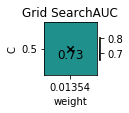

In [136]:
plot_meta_2d(meta = i_meta2, first_dimention = 'C', second_dimention = 'weight', b_best = 'AUC')

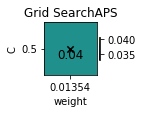

In [137]:
plot_meta_2d(meta = i_meta2, first_dimention = 'C', second_dimention = 'weight', b_best = 'APS')

In [138]:
i_meta2.to_csv(PATH +'Modeling_' + modeling + '/meta_file_after_pvalue.csv', sep='&')

In [139]:
i_meta2 = pd.read_csv(PATH +'Modeling_' + modeling + '/meta_file_after_pvalue.csv', sep='&')

In [140]:
train3 = train2.copy()
test3 = test2.copy()
list_of_columns_no_sys3 = list_of_columns_no_sys.copy()

for i in list_of_columns_no_sys:
    if i not in train3.columns.to_list():
        list_of_columns_no_sys3.remove(i)

attribute_list_model = attributes_list_new(train3, list_of_columns_no_sys3, [1, 98, 99, 99.99])

non_outliers = attribute_list_model.loc[attribute_list_model['99%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
cols_outliers = list_of_columns_no_sys.copy()
    
for o in non_outliers:
    if o in cols_outliers:
        cols_outliers.remove(o)
        
attribute_list_model['right_border'] = attribute_list_model['99%']
attribute_list_model['left_border'] = attribute_list_model['1%']
attribute_list_model.loc[attribute_list_model['attribute'].isin(non_outliers), 
                         'right_border'] = attribute_list_model['99.99%']

attribute_list_model.to_csv(PATH+'Modeling_' + modeling + '/attribute_list_model_after_pvalue2.csv')

[0.01   0.98   0.99   0.9999]
Number of finished repetitions: 0 | time:  15.07.2020 01:23:42


In [141]:
oot1 = oot[list(train3.columns)]

In [142]:
X_1_22, X_2_22, y_1_2, y_2, preproc2 = data_preprocessing(train3,
                                                          y_train, 
                                                        test3, 
                                                          y_test, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = attribute_list_model, 
                                                       var_col = 'attribute',
                                                       scale = 'mean', median = 'val_mediana', check_percentile = 5,
                                                   high_outlier = 'right_border', low_outlier = 'left_border', 
                                                       cols_outlier = cols_outliers, 
                                             cut_non_out_9999 = True)

X_3_2 = data_preprocessing_test(oot1, y_oot, necessary_fields_upper, categorial_list = list_of_categories_sel, 
                                drop_technical = True,
                            attribute_list = attribute_list_model, var_col = 'attribute',
                        median = 'val_mediana',
                      high_outlier = 'right_border', low_outlier = 'left_border', scale = preproc2, 
                                yeo_johnson = None, cols_outlier = cols_outliers)

In [143]:
X_1_22.shape

(303764, 32)

In [144]:
params_dict = {'weight_0':'class_weight', 'C': 'C', 'max_iter': 'max_iter'}
other_hyps = {'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear' }
pass_model = LogisticRegression

In [145]:
print(50*'-', 'By AUC test', 50*'-')
auc_model, auc_scores, auc_test_pred = train_model_receive_stats(X_1_22, 
                                                                 y_1_2, X_2_22, y_2, 
                                                                 meta = i_meta2, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')


print(50*'-', 'By AUC oot', 50*'-')
auc_model, auc_scores_oot, auc_oot_pred = train_model_receive_stats(X_1_22, y_1_2, X_3_2, y_oot, 
                                                                 meta = i_meta2, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')

-------------------------------------------------- By AUC test --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
15.07.2020 01:23:50 start of logit fit
15.07.2020 01:24:00 end of logit fit
15.07.2020 01:24:00
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.23241359173533271
--------------------
AUC =  0.7141965218925101
AUC train = 0.7331559336366822
Gini =  0.4283930437850203
Gini train = 0.4663118672733644
Stability = 0.9186835546132154
Average precision score =  0.030782417976346496
---------- Treshold by F_score ----------
Accuracy =  0.8889476048299733
Score F1 =  0.061201697565333925
Precision =  0.03447841952938216
Recall =  0.27209533267130087
Approval rate =  0.10498850635453272
-------------------------------------------------- By AUC oot --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
15.07.2020 01:24:01 start of logit fit
15.07.2020 01:24:10 end of logit fit
15.07.2020 01:24:10
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.24220698216739941
--------------------
AUC =  0.716864168503936
AUC train = 0.7331559336366822
Gini =  0.43372833700787194
Gini train = 0.4663118672733644
Stability = 0.9301250245763291
Average precision score =  0.026723041647014403
---------- Treshold by F_score ----------
Accuracy =  0.8857101808451412
Score F1 =  0.05709205847491111
Precision =  0.03153988868274583
Recall =  0.3007284079084287
Approval rate =  0.10970433824805895


In [146]:
joblib.dump(auc_model, PATH+ 'Modeling_' + modeling + '/auc_model2.dat')
joblib.dump(preproc2, PATH+ 'Modeling_' + modeling + '/preproc2.dat')

['D:/Share/01 -Risk Desc Science/CRM/Branch_2019/Modeling_one_factor/preproc2.dat']

In [147]:
auc_tests = pd.DataFrame(auc_test_pred)
auc_tests.rename(columns = {0: 'prediction'}, inplace = True)

Text(0.5, 1.0, 'Histograms 0 class')

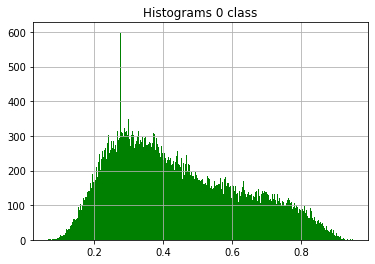

In [148]:
auc_tests.loc[y_2 == 0, 'prediction'].hist(bins = 500, color = 'green')
plt.title('Histograms 0 class')

Text(0.5, 1.0, 'Histograms 1 class')

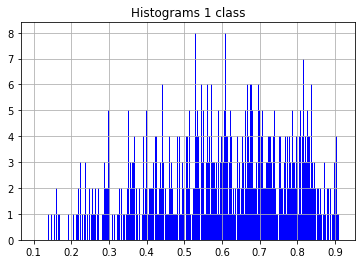

In [149]:
auc_tests.loc[y_2 == 1, 'prediction'].hist(bins = 500, color = 'blue')
plt.title('Histograms 1 class')

In [152]:
betas = []

for i, v in enumerate(X_1_22.columns):
    betas.append([v, auc_model.coef_[0][i]])
    
betas.append(['Intercept', auc_model.intercept_[0]])

betas = pd.DataFrame.from_records(betas, columns = ['Variable', 'Coef'])
definition_2 = pd.read_csv(PATH + 'Selection/SandBox/definition_2.csv')
betas1 = pd.merge(betas, definition_2.rename(columns = {'variable': 'Variable'}), how = 'left', on = 'Variable')
betas1['abs_coef'] = abs(betas1['Coef'])
betas1.sort_values(by = 'abs_coef', ascending = False)
betas1.to_csv(PATH +'Modeling_' + modeling + '/betas3.csv', sep='&')
betas.to_csv(PATH +'Modeling_' + modeling + '/betas_new3.csv', sep='&')

In [153]:
for_del = ['ScoreF1_b_best', 'Acc_b_best', 'Pre_b_best', 'Rec_b_best', 
               'Approval_rate_b_best', 'b_best']
for i in for_del:
    if i in auc_scores.keys():
        auc_scores.pop(i, None)
        
scores = pd.DataFrame(auc_scores)
scores.to_csv(PATH +'Modeling_' + modeling + '/scores_test.csv', sep='&')

for i in for_del:
    if i in auc_scores_oot.keys():
        auc_scores_oot.pop(i, None)
        
scores_oot = pd.DataFrame(auc_scores_oot)
scores_oot.to_csv(PATH +'Modeling_' + modeling + '/scores_oot.csv', sep='&')

In [154]:
oot2 = oot.join(y_oot)
oot2 = oot2.join(pd.Series(auc_oot_pred, name='score'))
oot2.to_csv(PATH +'Modeling_' + modeling + '/oot_with_scores.csv', sep='&')

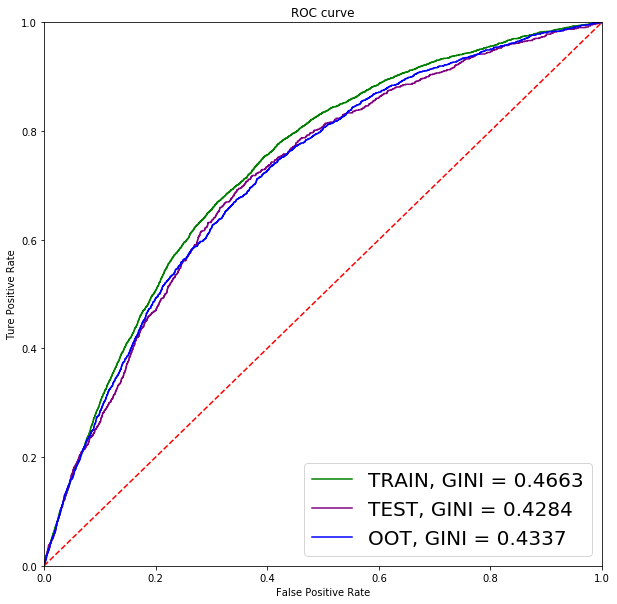

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = auc_model

y_pred_train = clf.predict_proba(X_1_22)[:,1]
#train_loss = log_loss(y_1_r, y_pred_train)
y_pred_test = clf.predict_proba(X_2_22)[:,1]
y_pred_oot = clf.predict_proba(X_3_2)[:,1]

fpr_train, tpr_train, _ = metrics.roc_curve(y_1_2, y_pred_train)
fpr_test, tpr_test, _ = metrics.roc_curve(y_2, y_pred_test)
fpr_oot, tpr_oot, _ = metrics.roc_curve(y_oot, y_pred_oot)
gini_train = 2 * metrics.auc(fpr_train,tpr_train) - 1
gini_test = 2 * metrics.auc(fpr_test,tpr_test) - 1
gini_oot = 2 * metrics.auc(fpr_oot,tpr_oot) - 1

plt.figure(figsize = (10, 10))

plt.title('ROC curve')

plt.plot(fpr_train, tpr_train, label = 'TRAIN, GINI = %0.4f'%gini_train, color = 'green')
plt.plot(fpr_test, tpr_test, label = 'TEST, GINI = %0.4f'%gini_test, color = 'purple')
plt.plot(fpr_oot, tpr_oot, label = 'OOT, GINI = %0.4f'%gini_oot, color = 'blue')

plt.legend(loc = 'lower right', fontsize=20)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Ture Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()## По месяцам

### Lightgbm

In [161]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier

oot_gbm = oot[list(train3.columns)]

In [162]:
train_lgbm_data, test_lgbm_data, y_1_2, y_2 = data_preprocessing(train3,
                                                          y_train, 
                                                        test3, 
                                                          y_test, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = None, 
                                                       var_col = None,
                                                       scale = False, median = 'median', check_percentile = 5,
                                                   high_outlier = None, low_outlier = None, 
                                                       cols_outlier = [], 
                                             cut_non_out_9999 = False)

train_lgbm_data, oot_lgbm_data, y_1_2, y_3 = data_preprocessing(train3,
                                                          y_train, 
                                                        oot_gbm, 
                                                          y_oot, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = None, 
                                                       var_col = None,
                                                       scale = False, median = 'median', check_percentile = 5,
                                                   high_outlier = None, low_outlier = None, 
                                                       cols_outlier = [], 
                                             cut_non_out_9999 = False)

In [163]:
params_lgbm = {
    'boosting_type': 'gbdt',
    'max_depth': 3,
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'verbose': 0,
    'n_estimators': 100,
    'class_weight': {0: w_b, 1: 1},
    'random_state': 241, 
    'n_jobs': 5}

In [164]:
lightgbm_class = LGBMClassifier(**params_lgbm)
from datetime import datetime
print('Starting training...', datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S"))
# train
gbm = lightgbm_class.fit(train_lgbm_data, y_1_2)
print('Ending training...', datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S"))

y_train_pred = gbm.predict_proba(train_lgbm_data)[:, 1]
y_test_pred = gbm.predict_proba(test_lgbm_data)[:, 1]
y_oot_pred = gbm.predict_proba(oot_lgbm_data)[:, 1]

print('gini train = ', roc_auc_score(y_1_2, y_train_pred)*2-1, 
      'average precision score train = ', average_precision_score(y_train, y_train_pred))

print('gini test = ', roc_auc_score(y_2, y_test_pred)*2-1, 
      'average precision score test = ', average_precision_score(y_test, y_test_pred))

print('gini oot = ', roc_auc_score(y_3, y_oot_pred)*2-1, 
      'average precision score oot = ', average_precision_score(y_oot, y_oot_pred))

Starting training... 15.07.2020 01:24:51
Ending training... 15.07.2020 01:24:54
gini train =  0.5335125177044389 average precision score train =  0.05080575509121168
gini test =  0.4358553017997959 average precision score test =  0.03265739425346018
gini oot =  0.4429617119285105 average precision score oot =  0.03046334179477854


In [165]:
scores_lightgbm = pd.DataFrame()

scores_lightgbm['gini_train'] = [roc_auc_score(y_1_2, y_train_pred)*2-1]
scores_lightgbm['gini_test'] = [roc_auc_score(y_2, y_test_pred)*2-1]
scores_lightgbm['gini_oot'] = [roc_auc_score(y_3, y_oot_pred)*2-1]
scores_lightgbm['APS_train'] = [average_precision_score(y_train, y_train_pred)]
scores_lightgbm['APS_test'] = [average_precision_score(y_test, y_test_pred)]
scores_lightgbm['APS_oot'] = [average_precision_score(y_oot, y_oot_pred)]

In [166]:
scores_lightgbm

,gini_train,gini_test,gini_oot,APS_train,APS_test,APS_oot
0,0.533513,0.435855,0.442962,0.050806,0.032657,0.030463


In [167]:
scores_lightgbm.to_csv(PATH+ 'Modeling_' + modeling + '/scores_lightgbm.csv', sep='&')

## 2.2 Forward Scheme  

In [12]:
all_columns = pd.read_csv(PATH + 'Selection/SandBox/selected_features_forest_definition.csv', sep = '&')

In [13]:
data1 = pd.read_csv(PATH + 'Data Sets/' +  train_data, sep = '&', encoding = 'cp1251')
data1.columns = [col.upper() for col in data1.columns]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1195) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
data = turn_variables_with_values(data1, all_columns)

In [15]:
columns = data.columns

In [16]:
#data = pd.read_csv(PATH+'Data Sets/train_binned.csv', sep = '&', encoding = 'cp1251')
categorial_data = pd.read_csv(PATH+'Selection/SandBox/categorial_data.csv', sep='&')
sys_data = pd.read_csv(PATH+'Selection/SandBox/sys_data.csv', sep='&')
del_data = pd.read_csv(PATH+'Selection/SandBox/del_data.csv', sep='&')
changes = pd.read_csv(PATH + 'Selection/SandBox/changes.csv', sep = '&')

In [17]:
categorial_columns = categorial_data['variable'].to_list()
COL_SYS = sys_data['variable'].to_list()
COL_DEL = del_data['variable'].to_list()

In [18]:
necessary_fields_upper

['GOOD_FLAG', 'MONTH_CALL', 'CIF_ID']

In [20]:
columns = list(data.columns)

In [21]:
file_name = PATH + 'Selection/excel/12. COR_NUM_binned.xlsx'
correlation_num1 = pd.read_excel(file_name)
file_name = PATH + 'Selection/excel/12. COR_CAT_binned.xlsx'
correlation_cat1 = pd.read_excel(file_name)
definition_2 = pd.read_csv(PATH + 'Selection/SandBox/definition_2.csv')

In [22]:
correlation_cat1.set_index('Unnamed: 0', inplace = True)
correlation_num1.set_index('Unnamed: 0', inplace = True)

In [23]:
correlation_num1.head()

,FUNDEDAMT_O,COUNTPAIDOUT_O,MAXMOBOPENEVER_ALL_O,MOBC_ALL_O,COUNTOFPAYMENTSL24M_O,COUNTOFPAYMENTSL12M_O,COUNTOFPAYMENTSL6M_O,COUNTOFPAYMENTSL3M_O,COUNTOFPAYMENTSCM_O,PAYAMTCM_O,...,C_SCHEDULE2FACTPAY12M,C_SCHEDULE2FACTPAY6M,C_SCHEDULE2FACTPAY1M,C_SCHEDULE2FACTPAY12M_ACTIVE,C_SCHEDULE2FACTPAY6M_ACTIVE,C_COUNTDAYSTASKL3M,C_COUNTOPERATORCALLL3M,AGE,EMPINCOMEAMT,CCDLOANRATE
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
FUNDEDAMT_O,1.000000,0.631588,0.332429,0.520042,0.467620,0.368827,0.298293,0.221677,0.124759,0.249152,...,0.038479,0.037526,0.001431,0.144804,0.094340,-0.031677,-0.041479,-0.018481,0.007235,0.127727
COUNTPAIDOUT_O,0.631588,1.000000,0.462896,0.737957,0.506750,0.353684,0.243662,0.152241,0.034977,0.102080,...,0.024838,0.015454,-0.005084,0.121531,0.077455,-0.050530,-0.074673,0.051403,0.007325,0.147292
MAXMOBOPENEVER_ALL_O,0.332429,0.462896,1.000000,0.872276,0.580076,0.420351,0.284050,0.172020,0.031850,0.022322,...,0.006390,-0.005149,0.008801,0.029232,0.020020,-0.049015,-0.086279,0.063419,0.007278,0.366514
MOBC_ALL_O,0.520042,0.737957,0.872276,1.000000,0.660897,0.488577,0.351970,0.240561,0.089038,0.050016,...,0.010075,0.000102,0.011878,0.058490,0.040514,-0.040299,-0.072178,0.074406,0.012370,0.304397
COUNTOFPAYMENTSL24M_O,0.467620,0.506750,0.580076,0.660897,1.000000,0.883232,0.702675,0.533400,0.273235,0.074207,...,0.009398,0.008473,0.021598,0.079123,0.061805,-0.045098,-0.070718,0.028171,0.001842,0.280343


In [24]:
result_tab_cat1, non_doubles_cat1, col_doubles_cat1, double_dic_cat1 = find_doubles_corr(data, columns, 
                                  correlation_cat1, definition = definition_2, lvl = 0.70, light_unstable = None)
result_tab_num1, non_doubles_num1, col_doubles_num1, double_dic_num1 = find_doubles_corr(data, columns, 
                                  correlation_num1, definition = definition_2, lvl = 0.70, light_unstable = None)

Порог = 0.7 Осталось фичей = 122 Коррелир.фичей = 336
Порог = 0.7 Осталось фичей = 269 Коррелир.фичей = 199


In [25]:
result_tab_cat1, non_doubles_cat1, col_doubles_cat1, double_dic_cat1 = find_doubles_corr(data, columns, 
                                  correlation_cat1, definition = definition_2, lvl = 0.50, light_unstable = None)
result_tab_num1, non_doubles_num1, col_doubles_num1, double_dic_num1 = find_doubles_corr(data, columns, 
                                  correlation_num1, definition = definition_2, lvl = 0.50, light_unstable = None)

Порог = 0.5 Осталось фичей = 80 Коррелир.фичей = 378
Порог = 0.5 Осталось фичей = 138 Коррелир.фичей = 330


In [26]:
non_doubles1 = list(set(non_doubles_cat1 + non_doubles_num1))

In [27]:
len(non_doubles1)

218

In [28]:
COL_DEL1 = []

for i in data.columns:
    if i not in non_doubles1 + necessary_fields_upper:
        COL_DEL1.append(i)

In [29]:
data.drop(COL_DEL1, axis = 1, inplace = True)

In [30]:
for i in necessary_fields_upper:
    if i not in list(data.columns):
        print(i)

In [31]:
data_prepr, scale = data_preprocessing_train(data, COL_TRG, 
                                technical_values = [COL_SYS+necessary_fields_upper], 
                                drop_technical = False,
                                yeo_johnson = False, 
                                attribute_list = None, 
                                var_col = None,
                                scale = 'mean', 
                                median = 'median',
                                high_outlier = 99, 
                                low_outlier = 1, 
                                cols_outlier = None)

data = data_preprocessing_train(data, COL_TRG, 
                                technical_values = [COL_SYS+necessary_fields_upper], 
                                drop_technical = False,
                                yeo_johnson = False, 
                                attribute_list = None, 
                                var_col = None,
                                scale = False, 
                                median = 'median',
                                high_outlier = None, 
                                low_outlier = None, 
                                cols_outlier = None)


In [32]:
if 'Unnamed: 0' in data_prepr.columns.to_list():
    data_prepr.drop('Unnamed: 0', axis = 1, inplace = True)
    
if 'Unnamed: 0.1' in data_prepr.columns.to_list():
    data_prepr.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [33]:
data_prepr.head()

,CIF_ID,MAXPTIEVER_ACTUAL_O,MAXPTIEVER_O,SUMPAYCMTOMAXPAY_O,TRANSNUML3M_O,CASHL1M_O,CASHL12M_O,SUMPAYMENTCMTOLIMITCARD_O,SUMPAYMENTCMTOLIMIT_O,SUMPAYMENTL3MTOLIMIT_O,...,DISTANCE_bin,COUNTVERYNEGATIVE_12_bin,COUNTVERYPOSITIVE_24_bin,COUNTIN_24_bin,SUMONLYPOS_24_bin,C_DAYSBETWLASTDELINQS12M_bin,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,C_DAYSSINCELASTTPC12M_bin,C_COUNTIN2COUNTOUTALLL12M_CL_bin,EMPINCOMEAMT_bin
0,-1.934731,-0.514464,-0.569577,1.371029,-0.145053,-0.068704,-0.143452,-0.200204,-0.060802,0.212627,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.934731,-0.476727,-0.529924,-0.270407,-0.145053,-0.068704,-0.143452,-0.200204,-0.329695,-0.377394,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.934731,-0.483769,-0.573282,-0.853356,-0.145053,-0.068704,-0.143452,-0.200204,-0.340178,-0.406303,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,-1.934731,-0.483769,-0.573282,-0.853356,-0.145053,-0.068704,-0.143452,-0.200204,-0.340178,-0.406303,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,-1.934731,-0.476727,-0.529924,-0.270407,-0.145053,-0.068704,-0.143452,-0.200204,-0.329695,-0.377394,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
target = target.upper()

In [35]:
data_prepr1 = data_prepr.drop(necessary_fields_upper, axis = 1)
y = data_prepr[target]

In [36]:
once_rows = sum(data[target])
second_rows = (len(data[target]) - sum(data[target]))
y_unique = sorted(data[target].unique())
all_rows = len(data[target])

once_rows_share = once_rows/all_rows
second_rows_share = second_rows/all_rows
second_rows_share/once_rows_share

if once_rows < second_rows:
    w_b = once_rows/second_rows
else:
    w_b = second_rows/once_rows

In [37]:
once_rows_share, second_rows_share

(0.013356638744146165, 0.9866433612558538)

In [38]:
w_b

0.013537453621686667

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
lr = LogisticRegression(class_weight = {0: w_b, 1:1}, max_iter = 300, C = 0.5, solver = 'liblinear', penalty = 'l2')


sfs1 = SFS(lr, 
           k_features= 'best', 
           forward=True, 
           floating=False, 
           verbose=5,
           scoring='roc_auc',
           n_jobs = 3,
           cv=2)

sfs1 = sfs1.fit(data_prepr1, y)

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   13.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   24.6s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   45.4s
[Parallel(n_jobs=3)]: Done 218 out of 218 | elapsed:   53.7s finished

[2020-06-23 20:43:32] Features: 1/218 -- score: 0.6367878653575303[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   15.8s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   39.4s
[Parallel(n_jobs=3)]: Done 217 out of 217 | elapsed:   54.8s finished

[2020-06-23 20:44:26] Features: 2/218 -- score: 0.678872138018064[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    5.4s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   22.4s
[Parallel(n_jo

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   20.1s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done 197 out of 197 | elapsed:  4.9min finished

[2020-06-23 21:44:23] Features: 22/218 -- score: 0.729287395539181[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   19.8s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  4.5min
[Parallel(n_jobs=3)]: Done 196 out of 196 | elapsed:  5.6min finished

[2020-06-23 21:50:02] Features: 23/218 -- score: 0.7296745687760829[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   26.6s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  5.0min
[Parallel(n_jobs=3)]: Done

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   47.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  3.9min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  8.9min
[Parallel(n_jobs=3)]: Done 176 out of 176 | elapsed: 10.1min finished

[2020-06-24 00:27:00] Features: 43/218 -- score: 0.7342820354420894[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   41.7s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  9.5min
[Parallel(n_jobs=3)]: Done 175 out of 175 | elapsed: 10.8min finished

[2020-06-24 00:37:46] Features: 44/218 -- score: 0.7344175577121395[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   46.3s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  4.2min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  9.7min
[Parallel(n_jobs=3)]: Don

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   41.8s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  4.4min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.1min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | e

[Parallel(n_jobs=3)]: Done 157 out of 157 | elapsed: 14.8min finished

[2020-06-24 04:14:10] Features: 62/218 -- score: 0.735778975329688[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.4min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  6.3min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\ex

[Parallel(n_jobs=3)]: Done 153 out of 153 | elapsed: 16.4min finished

[2020-06-24 05:22:12] Features: 66/218 -- score: 0.7364031903905331[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.4min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done 149 out of 149 | elapsed: 16.4min finished

[2020-06-24 06:27:12] Features: 70/218 -- score: 0.7366365595018647[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.4min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done 145 out of 145 | elapsed: 12.8min finished

[2020-06-24 07:22:29] Features: 74/

[Parallel(n_jobs=3)]: Done 141 out of 141 | elapsed: 12.8min finished

[2020-06-24 08:13:57] Features: 78/218 -- score: 0.7368971009092233[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.2min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done 137 out of 137 | elapsed: 12.9min finished

[2020-06-24 09:05:43] Features: 82/218 -- score: 0.7369531803421565[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.1min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  6.4min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sk

[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  7.2min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done 128 out of 128 | e

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.4min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  7.2min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done  66 tasks      | e

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  8.1min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done 114 out of 114 | elapsed: 13.7min finished

[2020-06-24 14:23:49] Features: 105/218 -- score: 0.7369227455218698[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.4min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 11.3min
[Parallel(n_jobs=3)]: Done 109 out of 109 | e

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 10.8min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sk

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.8min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 15.9min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.8min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  9.2min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  9.6min
[Parallel(n_jobs=3)]: Done  89 out of  89 | elapsed: 13.0min finished

[2020-06-24 20:42:44] Features: 130/218 -- score: 0.7363100875384861[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  1.8min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 10.7min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  83 out of  83 | e

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 11.4min
[Parallel(n_jobs=3)]: Done  78 out of  78 | elapsed: 13.5min finished

[2020-06-24 23:10:41] Features: 141/218 -- score: 0.7362351262360843[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.1min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed: 12.5min
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed: 13.6min finished

[2020-06-25 00:32:58] Features: 147/218 -- score: 0.7359242364781244[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  66 out of  66 | elapsed: 13.2min finished

[2020-06-25 01:56:24] Features: 153/218 -- score: 0.7354614680863971[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.5min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  59 out of  59 | elapsed: 13.0min finished

[2020-06-25 03:29:10] Features: 160/218 -- score: 0.7350735537043434[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.6min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker

[Parallel(n_jobs=3)]: Done  52 out of  52 | elapsed: 11.7min finished

[2020-06-25 04:54:59] Features: 167/218 -- score: 0.7343657980495008[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.6min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  43 out of  43 | elapsed: 10.3min finished

[2020-06-25 06:33:56] Features: 176/218 -- score: 0.7331698060106211[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  2.8min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker

[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  3.0min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  34 out of  34 | elapsed:  8.8min finished

[2020-06-25 07:58:10] Features: 185/218 -- score: 0.7316261079521655[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  3.3min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done  23 out of  23 | elapsed:  6.5min remaining:    0.0s
[Parallel(n_jobs=3)]: Done  23 out of  23 | elapsed:  6.5min finished

[2020-06-25 09:21:11] Features: 196/218 -- score: 0.7294994752972936[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elaps

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   4 out of   7 | elapsed:  2.0min remaining:  1.5min
[Parallel(n_jobs=3)]: Done   7 out of   7 | elapsed:  2.9min finished

[2020-06-25 10:35:24] Features: 212/218 -- score: 0.7247456415424238[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=3)]: Done   3 out of   6 | elapsed:  1.1min remaining:  1.1min
[Parallel(n_jobs=3)]: Done   6

In [41]:
forward_col = list(sfs1.k_feature_names_)
len(forward_col)

90

In [42]:
vif_del = []

In [43]:
vif = calculate_vif(data_prepr[forward_col])
vif.sort_values(by = 'VIF', ascending = False, inplace = True)

25.06.2020 10:45:03 0 MAXPTIEVER_ACTUAL_O
25.06.2020 10:45:32 10 BALANCETOTOTALCURRENT_B
25.06.2020 10:46:00 20 BP_CREDITCOUNT_AD
25.06.2020 10:46:35 30 MICRO2ALL_24M_C
25.06.2020 10:48:11 40 C_COUNTNOTREADEMAIL3M
25.06.2020 10:49:24 50 C_COUNTOFPAYMENTS2AMONTHSL12M
25.06.2020 10:50:17 60 GENDER_AP_2.0
25.06.2020 10:51:10 70 PRSEDULEVEL_3.0
25.06.2020 10:51:45 80 BP_CREDITCOUNT_AD_bin


In [44]:
vif.head()

,Features,VIF
64,REFERCREDITANALYST_AD_0.0,22.325384
89,EMPINCOMEAMT_bin,15.819019
81,DLQ_PD2AMTOUTS_C_bin,9.434491
88,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,9.398497
83,BURAPPRRT_L3M_C_bin,7.012938


In [45]:
vif = vif.sort_values(by = 'VIF', ascending = False).reset_index()
while vif['VIF'][0] > 10:
    print(vif.head(5))
    c = vif.Features[0]
    vif_del.append(c)
    print('Delete ', c)
    vif = calculate_vif(data_prepr[[c for c in forward_col if c not in vif_del]])
    vif = vif.sort_values(by = 'VIF', ascending = False).reset_index()

   index                          Features        VIF
0     64         REFERCREDITANALYST_AD_0.0  22.325384
1     89                  EMPINCOMEAMT_bin  15.819019
2     81              DLQ_PD2AMTOUTS_C_bin   9.434491
3     88  C_COUNTOFPAYMENTS2AMONTHSL1M_bin   9.398497
4     83               BURAPPRRT_L3M_C_bin   7.012938
Delete  REFERCREDITANALYST_AD_0.0
25.06.2020 10:52:34 0 MAXPTIEVER_ACTUAL_O
25.06.2020 10:53:30 10 BALANCETOTOTALCURRENT_B
25.06.2020 10:53:59 20 BP_CREDITCOUNT_AD
25.06.2020 10:54:43 30 MICRO2ALL_24M_C
25.06.2020 10:55:14 40 C_COUNTNOTREADEMAIL3M
25.06.2020 10:55:46 50 C_COUNTOFPAYMENTS2AMONTHSL12M
25.06.2020 10:56:19 60 GENDER_AP_2.0
25.06.2020 10:56:57 70 PRSEDULEVEL_4.0
25.06.2020 10:57:27 80 DLQ_PD2AMTOUTS_C_bin
   index                          Features        VIF
0     88                  EMPINCOMEAMT_bin  13.248166
1     80              DLQ_PD2AMTOUTS_C_bin   9.044739
2     87  C_COUNTOFPAYMENTS2AMONTHSL1M_bin   8.817500
3     82               BURAPPRRT_L3M_C_

In [46]:
vif.head()

,index,Features,VIF
0,80,DLQ_PD2AMTOUTS_C_bin,8.576601
1,87,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,8.462647
2,82,BURAPPRRT_L3M_C_bin,6.429877
3,85,SUMONLYPOS_24_bin,5.554608
4,59,INCTYPE_AP_1.0,4.554822


In [47]:
len(vif_del)

2

In [48]:
new_features_list = []
cols = ['new variable', 'genuine variable', 'rule', 'values']

for i in forward_col:
    if i in list(changes['new variable']):
        change = changes[changes['new variable'] == i]
        new_features_list.append([list(change['new variable'])[0], list(change['genuine variable'])[0], 
                                  list(change['rule'])[0], list(change['values'])[0]])
    else:
        new_features_list.append([i, i, 'Missing', np.nan])
        
for i in necessary_fields_upper:
    new_features_list.append([i, i, 'Missing', np.nan])
    
new_features_data = pd.DataFrame.from_records(new_features_list, columns = cols)
new_features_data_no_vif = new_features_data[~new_features_data['new variable'].isin(vif_del)]
new_features_data_no_vif_no_sys = new_features_data_no_vif[~new_features_data_no_vif['new variable'].isin(necessary_fields_upper)]

In [49]:
new_features_data.shape, new_features_data_no_vif.shape

((93, 4), (91, 4))

In [50]:
new_features_data.to_csv(PATH + 'Selection/SandBox/selected_features_forward.csv', sep = '&')
new_features_data_no_vif.to_csv(PATH + 'Selection/SandBox/selected_features_vif_forward.csv', sep = '&')
new_features_data_no_vif_no_sys.to_csv(PATH + 'Selection/SandBox/selected_features_vif_no_sys_forward.csv', sep = '&')

In [2661]:
new_features_data = pd.read_csv(PATH + 'Selection/SandBox/selected_features_forward.csv', sep = '&')
new_features_data_no_vif= pd.read_csv(PATH + 'Selection/SandBox/selected_features_vif_forward.csv', sep = '&')
new_features_data_no_vif_no_sys= pd.read_csv(PATH + 'Selection/SandBox/selected_features_vif_no_sys_forward.csv', sep = '&')

In [2662]:
modeling = 'forward'

In [2663]:
selected_features = new_features_data_no_vif
sel_c = selected_features['genuine variable'].to_list()

In [2664]:
gc.collect()

18958

In [2665]:
train = pd.read_csv(PATH + 'Data Sets/' +  train_data, sep = '&', encoding = 'cp1251')
train.columns = [col.upper() for col in train.columns]

test = pd.read_csv(PATH + 'Data Sets/' +  test_data, sep = '&', encoding = 'cp1251')
test.columns = [col.upper() for col in test.columns]

oot = pd.read_csv(PATH + 'Data Sets/' +  oot_data, sep = '&', encoding = 'cp1251')
oot.columns = [col.upper() for col in oot.columns]

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1195) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2666]:
train = turn_variables_with_values(train, selected_features)
test = turn_variables_with_values(test, selected_features)
oot = turn_variables_with_values(oot, selected_features)

In [2667]:
target = target.upper()

In [2668]:
y_train = train[target]
y_test = test[target]
y_oot = oot[target]

train.drop(target, axis = 1, inplace = True)
test.drop(target, axis = 1, inplace = True)
oot.drop(target, axis = 1, inplace = True)

In [2669]:
train.head()

,MAXPTIEVER_ACTUAL_O,MAXPTIEVER_O,TRANSNUML3M_O,TRANSNUMCMTOTRANSNUML12M_O,TRANSAVGAMOUNTL12M_O,CASHCMTOLIMIT_O,MAXPAYMENTTOLIMIT_O,CASHL6MTOPAYMAMTL6M_O,SUMOVERDUE00PEVER_B,MAXDAYSINDELINQCURRENT_B,...,DLQ_PD2AMTOUTS_C_bin,AMTOPNWBCC_MIN_C_bin,BURAPPRRT_L3M_C_bin,C_PROCENTREADEMAIL_1M_bin,COUNTVERYNEGATIVE_12_bin,SUMONLYPOS_24_bin,C_DAYSBETWLASTDELINQS12M_bin,C_COUNTOFPAYMENTS2AMONTHSL1M_bin,MONTH_CALL,CIF_ID
0,0.233347,0.353232,NaN,NaN,NaN,NaN,NaN,NaN,722.37,0.0,...,1,0,1,0,0,0,0,0,201911,1000000653
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,201911,1000002153
2,0.334041,0.339517,NaN,NaN,NaN,NaN,NaN,NaN,3083.54,0.0,...,1,1,1,0,1,0,0,1,201911,1000002599
3,0.334041,0.339517,NaN,NaN,NaN,NaN,NaN,NaN,3083.54,0.0,...,1,1,1,0,1,1,1,1,202001,1000002599
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,201911,1000003476


In [2670]:
list_of_columns = selected_features['new variable'].to_list()
list_of_columns_no_sys = list_of_columns.copy()
for i in necessary_fields_upper:
    if i in list_of_columns_no_sys:
        list_of_columns_no_sys.remove(i)

In [2671]:
len(list_of_columns_no_sys)

88

In [2672]:
attribute_list_model = attributes_list_new(train, list_of_columns_no_sys, [0.01, 0.5, 1, 2, 5, 95, 97, 
                                                                           98, 99, 99.5, 99.99])

[1.000e-04 5.000e-03 1.000e-02 2.000e-02 5.000e-02 9.500e-01 9.700e-01
 9.800e-01 9.900e-01 9.950e-01 9.999e-01]
Number of finished repetitions: 0 | time:  03.07.2020 13:48:37


In [2673]:
attribute_list_model[attribute_list_model['99%'] == attribute_list_model['1%']]

,attribute,type_val,count_dist,count_miss,moda_val,count_value_moda,count_val,mean,stand_d_val,min_val,...,2%,5%,val_mediana,95%,97%,98%,99%,99.5%,99.99%,max_val


In [2674]:
list_of_categories_sel = attribute_list_model.loc[(attribute_list_model['count_dist'] == 2), 'attribute'].to_list() 

In [2675]:
categorials_data_fin = pd.read_csv(PATH + 'Selection/SandBox/categories_fin.csv', sep = '&')

In [2676]:
categorials_data_fin.head()

,Unnamed: 0,feature
0,0,TRANSNUMCMTOTRANSNUML3M_O_bin
1,1,R_CNT_ALL_GP_REP_bin
2,2,SUMPAYMENTL6MTOLIMITCARD_O_bin
3,3,SUMONLYPOS_24_bin
4,4,C_SCHEDULE2FACTPAY6M_bin


In [2677]:
for i in list_of_columns_no_sys:
    if i in categorials_data_fin['feature'].to_list():
        list_of_categories_sel.append(i)

In [2679]:
iqr_outliers = find_ouliers_iqr(train, necessary_fields_upper, mult = 1.5, check_percentile = 1)

In [2680]:
once_rows = sum(y_train)
second_rows = (len(y_train) - sum(y_train))
y_unique = sorted(y_train.unique())
all_rows = len(y_train)

once_rows_share = once_rows/all_rows
second_rows_share = second_rows/all_rows
second_rows_share/once_rows_share

if once_rows < second_rows:
    w_b = once_rows/second_rows
else:
    w_b = second_rows/once_rows

In [2681]:
once_rows_share, second_rows_share

(0.013356638744146165, 0.9866433612558538)

In [2682]:
w_b

0.013537453621686667

In [2690]:
#C = np.logspace(-3,0.5,num=9)
C = [0.5]
CC  = [1]
w = np.multiply(CC, w_b)
#C = np.logspace(-3,2,1)
#w = np.logspace(-1,1,2)*w_b
print(C)
print(w_b)
print(w)

[0.5]
0.013537453621686667
[0.01353745]


In [2691]:
from Filter_and_Grid_Search import simple_b_score_crm

In [2692]:
help(simple_b_score_crm)

Help on function simple_b_score_crm in module Filter_and_Grid_Search:

simple_b_score_crm(_tn, _fp, _fn, _tp, m_s, k, c, pos_label=None, sample_weight=None)
    Функция в одну строчку, которая считает бизнес метрику по элементам confusion matrix



In [2693]:
params_dictionary = {'C': C,
                     'weight_0': w,
                     'regularization': 'l2', 'random_state': 241, 
                    'solver': 'liblinear', 'max_iter':  [300]}
params_to_model = {'C': 'C', 'weight_0': 'class_weight', 'regularization':'penalty', 'random_state': 'random_state',
                  'solver': 'solver', 'max_iter': 'max_iter'}
pass_model = LogisticRegression

sort_by_var = sort_by_var.upper()
list_of_vars_for_strat = ['MONTH_CALL']
second_target = None
yeo_johnson = False
n_fold = 5
simple_b_score = simple_b_score_crm
business_dictionary = {'m_s': 15900, 'k': 47, 'c': 1}


In [2694]:
high_outs = [99]
low_outs = [1]
params_preproc_grid = {'high_outlier': high_outs, 'low_outlier': low_outs}

In [2695]:
combination_preproc = list(itertools.product(*params_preproc_grid.values()))

In [2696]:
from Filter_and_Grid_Search import br_correction

Максимальный BR = 0.015122076827641096
Список срезов для выравнивания: [201911 202001 201912]
Максимальный BR = 0.015125009827816652


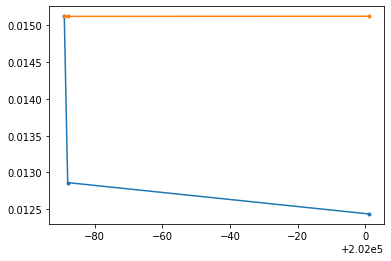

In [2697]:
train = train.join(y_train)
train1 = br_correction(train, index_month.upper(), target, correct = True, random_state = 42, alpha = 0)

In [2698]:
y_train = train1[target]
train1.drop(target, axis = 1, inplace = True)

In [2699]:
attribute_list_model = attributes_list_new(train1, list_of_columns_no_sys, high_outs+low_outs)

[0.99 0.01]
Number of finished repetitions: 0 | time:  03.07.2020 13:48:52


In [2700]:
len(C)*len(CC)

1

In [2701]:
from Filter_and_Grid_Search import lr_test_one_simple, lr_test_all_features

In [2702]:
new_meta_with_prepr = []

for combination in combination_preproc:
    outputs = list(combination)
    dicts = {}
    for position in range(len(combination)):
        dicts[list(params_preproc_grid.keys())[position]] = combination[position]
            
    non_outliers = attribute_list_model.loc[attribute_list_model[str(dicts['high_outlier'])+'%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
    cols_outliers = list_of_columns_no_sys.copy()
    
    for o in non_outliers:
        if o in cols_outliers:
            cols_outliers.remove(o)
                
    print('-'*20, dicts, non_outliers, '-'*20)
    i_meta = find_meta_params(train1, y_train, 
                            params_dictionary, params_to_model, pass_model, 
                            sort_by_var, list_of_vars_for_strat, n_fold, second_target, yeo_johnson, 
                            attribute_list = None, var_col = None, categorial_list = list_of_categories_sel,
                            cols_outlier = cols_outliers,
                            need_business = False, draw = False, draw_by_approval_rate = False,
                            simple_b_score = None, business_dict = None,
                            business_dict_sec = None,
                            scale = 'mean', median = 'median',
                            high_outlier = dicts['high_outlier'], 
                            low_outlier = dicts['low_outlier'], check_percentile = 1,
                            random_state = 241, task = 'binary', k_logs = 10,
                            cut_non_out_9999 = True)
    i_meta['high_outlier'] = dicts['high_outlier']
    i_meta['low_outlier'] = dicts['low_outlier']
        
    new_meta_with_prepr.append(i_meta)

-------------------- {'high_outlier': 99, 'low_outlier': 1} [] --------------------
{'C': [0.5], 'weight_0': array([0.01353745]), 'regularization': ['l2'], 'random_state': [241], 'solver': ['liblinear'], 'max_iter': [300]}
-------------------- 03.07.2020 13:52:36 0 -------------------- 
 Параметры: {'C': 0.5, 'class_weight': {0: 0.013537453621686667, 1: 1}, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear', 'max_iter': 300} 
 Среднее значение APS = 0.03818494080322411 
 Среднее значение AUC = 0.7342496563734715


In [2703]:
i_meta['weight'] = round(i_meta['weight_0'], 4)

In [2704]:
i_meta.sort_values(by = 'AUC', ascending = False)[['AUC', 'AUC_std', 'weight_0', 'C', 'high_outlier', 'low_outlier', 'Pre']]

,AUC,AUC_std,weight_0,C,high_outlier,low_outlier,Pre
0,0.73425,0.011009,0.013537,0.5,99,1,0.030224


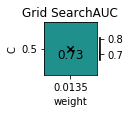

In [2705]:
plot_meta_2d(meta = i_meta, first_dimention = 'C', second_dimention = 'weight', b_best = 'AUC')

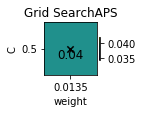

In [2706]:
plot_meta_2d(meta = i_meta, first_dimention = 'C', second_dimention = 'weight', b_best = 'APS')

In [2707]:
i_meta.to_csv(PATH +'Modeling_' + modeling + '/meta_file1.csv', sep='&')

In [2708]:
i_meta = pd.read_csv(PATH +'Modeling_' + modeling + '/meta_file1.csv', sep='&')

In [2709]:
list_of_columns = list(train1.columns)
list_of_columns_no_sys = list_of_columns.copy()
for i in necessary_fields_upper:
    if i in list_of_columns_no_sys:
        list_of_columns_no_sys.remove(i)

In [2710]:
attribute_list_model = attributes_list_new(train1, list_of_columns_no_sys, [1, 98, 99, 99.99])

[0.01   0.98   0.99   0.9999]
Number of finished repetitions: 0 | time:  03.07.2020 13:52:39


In [2711]:
non_outliers = attribute_list_model.loc[attribute_list_model['99%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
cols_outliers = list_of_columns_no_sys.copy()
    
for o in non_outliers:
    if o in cols_outliers:
        cols_outliers.remove(o)

In [2712]:
non_outliers

[]

In [2713]:
attribute_list_model['right_border'] = attribute_list_model['99%']
attribute_list_model['left_border'] = attribute_list_model['1%']

In [2714]:
attribute_list_model.loc[attribute_list_model['attribute'].isin(non_outliers), 'right_border'] = attribute_list_model['99.99%']

In [2715]:
attribute_list_model.to_csv(PATH+'Modeling_' + modeling + '/attribute_list_model_bef_pvalue.csv')

In [2716]:
oot1 = oot[train1.columns].copy()

In [2717]:
X_1_2, X_2_2, y_1_2, y_2, preproc_before_pvalue = data_preprocessing(train1, 
                                                                     y_train, 
                                                                            test, 
                                                                     y_test, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = attribute_list_model, 
                                                       var_col = 'attribute',
                                                       scale = 'mean', median = 'val_mediana', check_percentile = 5,
                                                   high_outlier = 'right_border', low_outlier = 'left_border', 
                                                       cols_outlier = cols_outliers, 
                                             cut_non_out_9999 = True)

X_3_2 = data_preprocessing_test(oot1, y_oot, necessary_fields_upper, categorial_list = list_of_categories_sel, 
                                drop_technical = True,
                            attribute_list = attribute_list_model, var_col = 'attribute',
                        median = 'val_mediana',
                      high_outlier = 'right_border', low_outlier = 'left_border', scale = preproc_before_pvalue, 
                                yeo_johnson = None, cols_outlier = cols_outliers)

In [2718]:
X_1_2.shape

(303764, 88)

In [2719]:
params_dict = {'weight_0':'class_weight', 'C': 'C', 'max_iter': 'max_iter'}
other_hyps = {'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear' }
pass_model = LogisticRegression

In [2720]:
X_1_2.columns

Index(['MAXPTIEVER_ACTUAL_O', 'MAXPTIEVER_O', 'TRANSNUML3M_O',
       'TRANSNUMCMTOTRANSNUML12M_O', 'TRANSAVGAMOUNTL12M_O', 'CASHCMTOLIMIT_O',
       'MAXPAYMENTTOLIMIT_O', 'CASHL6MTOPAYMAMTL6M_O', 'SUMOVERDUE00PEVER_B',
       'MAXDAYSINDELINQCURRENT_B', 'BALANCETOTOTALCURRENT_B',
       'MAXOVERDUETOLIMITEVER_B', 'MAXBALANCETOTOTALL6M_B',
       'TOTAL_INCOME_CURR_AP', 'EMPTIMEINJOB_AP', 'RATEPERCENT_AA',
       'CCDAMTREQ_AA', 'CCDLOANTERM_AA', 'PDSNBRUNITS_SUM_AA', 'PTI_FINAL_AD',
       'BP_CREDITCOUNT_AD', 'R_CNT_ALL_GP_REP', 'R_AMT_NB_AVG_REP',
       'R_MOB_MIN_REP', 'SINCELSTOPEN_C', 'UNUSEDLIMCCMIN_C',
       'DLQ_WRSTARR25E_C', 'TERMAPR_MIN_C', 'OW_PMT_DYN_C', 'SUMREPAID2LCC_C',
       'MICRO2ALL_24M_C', 'DLQ_CNT_C', 'OW_AV_DEBT2LIM_C', 'DLQ_DPDCURRSUM_C',
       'OW_ACTIV2AVCRD_C', 'SHARE_ACTPAID_C', 'SUMREPAIDNOBAL_C',
       'SINCELSTCLSDCC_C', 'INQ_NMB_C', 'C_COUNTALLSMS3M',
       'C_COUNTNOTREADEMAIL3M', 'DISTANCE', 'VERYNEGTOALL_12',
       'NEGTOALL_2020_12', 'VERYNE

In [2721]:
print(50*'-', 'By AUC', 50*'-')
auc_model_before_pvalue, auc_scores_before_pvalue, auc_test_pred_before_pvalue = train_model_receive_stats(X_1_2, 
                                                                 y_1_2, X_2_2, y_2, 
                                                                 meta = i_meta, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')

print(50*'-', 'By AUC oot', 50*'-')
auc_model_before_pvalue, auc_scores_oot_before_pvalue, auc_oot_pred_before_pvalue = train_model_receive_stats(X_1_2, y_1_2, 
                                                                                                              X_3_2, y_oot, 
                                                                 meta = i_meta, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')

-------------------------------------------------- By AUC --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
03.07.2020 13:53:09 start of logit fit
03.07.2020 13:53:38 end of logit fit
03.07.2020 13:53:38
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.22957435603179727
--------------------
AUC =  0.7181555334092127
AUC train = 0.7422331812980358
Gini =  0.43631106681842535
Gini train = 0.4844663625960717
Stability = 0.9006013636950967
Average precision score =  0.03152487916591825
---------- Treshold by F_score ----------
Accuracy =  0.9081168916955109
Score F1 =  0.0650625084016669
Precision =  0.03762437810945274
Recall =  0.24031777557100298
Approval rate =  0.08497370993737945
-------------------------------------------------- By AUC oot --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
03.07.2020 13:53:39 start of logit fit
03.07.2020 13:54:07 end of logit fit
03.07.2020 13:54:07
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.23412082086403266
--------------------
AUC =  0.7202557937825889
AUC train = 0.7422331812980358
Gini =  0.4405115875651777
Gini train = 0.4844663625960717
Stability = 0.9092717711187275
Average precision score =  0.026880964153886234
---------- Treshold by F_score ----------
Accuracy =  0.911852211027902
Score F1 =  0.0586843955762961
Precision =  0.03345237227607317
Recall =  0.23881373569198752
Approval rate =  0.082137576399739


In [2722]:
betas_before_pvalue = []

for i, v in enumerate(X_1_2.columns):
    betas_before_pvalue.append([v, auc_model_before_pvalue.coef_[0][i]])
    
betas_before_pvalue.append(['Intercept', auc_model_before_pvalue.intercept_[0]])

betas_before_pvalue = pd.DataFrame.from_records(betas_before_pvalue, columns = ['Variable', 'Coef'])
definition_2 = pd.read_csv(PATH + 'Selection/SandBox/definition_2.csv')
betas1_before_pvalue = pd.merge(betas_before_pvalue, definition_2.rename(columns = {'variable': 'Variable'}), 
                                how = 'left', on = 'Variable')
betas1_before_pvalue['abs_coef'] = abs(betas1_before_pvalue['Coef'])
betas1_before_pvalue.sort_values(by = 'abs_coef', ascending = False)
betas1_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/betas3_before_pvalue.csv', sep='&')
betas_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/betas_new3_before_pvalue.csv', sep='&')

In [2723]:
for_del = ['ScoreF1_b_best', 'Acc_b_best', 'Pre_b_best', 'Rec_b_best', 
               'Approval_rate_b_best', 'b_best']
for i in for_del:
    if i in auc_scores_before_pvalue.keys():
        auc_scores_before_pvalue.pop(i, None)
        
scores_before_pvalue = pd.DataFrame(auc_scores_before_pvalue)
scores_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/scores_test_before_pvalue.csv', sep='&')

for i in for_del:
    if i in auc_scores_oot_before_pvalue.keys():
        auc_scores_oot_before_pvalue.pop(i, None)
        
scores_oot_before_pvalue = pd.DataFrame(auc_scores_oot_before_pvalue)
scores_oot_before_pvalue.to_csv(PATH +'Modeling_' + modeling + '/scores_oot_before_pvalue.csv', sep='&')

In [2724]:
joblib.dump(auc_model_before_pvalue, PATH+ 'Modeling_' + modeling + '/auc_model_before_pvalue2.dat')
joblib.dump(preproc_before_pvalue, PATH+ 'Modeling_' + modeling + '/preproc_before_pvalue2.dat')

['D:/Share/01 -Risk Desc Science/CRM/Branch_2019/Modeling_forward/preproc_before_pvalue2.dat']

In [2725]:
from Filter_and_Grid_Search import lr_test_one_simple, lr_test_all_features

In [295]:
p_values2 = lr_test_all_features(auc_model_before_pvalue, LogisticRegression, X_1_2, y_train, 
                                 class_weight = auc_model_before_pvalue.get_params()['class_weight'],
                                 whole_model = True)
p_values2.sort_values(by = 'p_value', ascending = False, inplace = True)

Number of finished repetitions: 0 | time:  26.06.2020 09:21:41
Number of finished repetitions: 5 | time:  26.06.2020 09:27:05
Number of finished repetitions: 10 | time:  26.06.2020 09:32:33
Number of finished repetitions: 15 | time:  26.06.2020 09:37:56
Number of finished repetitions: 20 | time:  26.06.2020 09:42:46
Number of finished repetitions: 25 | time:  26.06.2020 09:47:35
Number of finished repetitions: 30 | time:  26.06.2020 09:52:26
Number of finished repetitions: 35 | time:  26.06.2020 09:57:18
Number of finished repetitions: 40 | time:  26.06.2020 10:02:15
Number of finished repetitions: 45 | time:  26.06.2020 10:07:16
Number of finished repetitions: 50 | time:  26.06.2020 10:12:19
Number of finished repetitions: 55 | time:  26.06.2020 10:17:20
Number of finished repetitions: 60 | time:  26.06.2020 10:22:19
Number of finished repetitions: 65 | time:  26.06.2020 10:28:02
Number of finished repetitions: 70 | time:  26.06.2020 10:34:57
Number of finished repetitions: 75 | time:

In [296]:
p_values2.to_csv(PATH + 'Modeling_' + modeling + '/p_values2.csv', sep = '&')

### Final train (selection with p-value)

In [2726]:
p_values2 = pd.read_csv(PATH + 'Modeling_' + modeling + '/p_values2.csv', sep = '&')
p_values2.sort_values(by = 'p_value', ascending = False, inplace = True)

In [2727]:
del_vars = p_values2.loc[p_values2['p_value'] > 0.05, 'Variable'].to_list()
if 'Intercept' in del_vars:
        del_vars.remove('Intercept')

In [2728]:
len(del_vars)

56

In [2729]:
train2 = train1.drop(del_vars, axis = 1)
test2 = test.drop(del_vars, axis = 1)

In [2730]:
list_of_columns_no_sys2 = list_of_columns_no_sys.copy()

for i in list_of_columns_no_sys:
    if i not in train2.columns.to_list():
        list_of_columns_no_sys2.remove(i)
        
attribute_list_model = attributes_list_new(train2, list_of_columns_no_sys2, high_outs+low_outs)

non_outliers = attribute_list_model.loc[attribute_list_model['99%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
cols_outliers = list_of_columns_no_sys2.copy()
    
for o in non_outliers:
    if o in cols_outliers:
        cols_outliers.remove(o)

[0.99 0.01]
Number of finished repetitions: 0 | time:  03.07.2020 13:54:11


In [2731]:
C = [0.5]
CC  = [1]
w = np.multiply(CC, w_b)
print(C)
print(w_b)
print(w)

[0.5]
0.013537453621686667
[0.01353745]


In [2732]:
len(C)*len(CC)

1

In [2733]:
params_dictionary = {'C': C,
                     'weight_0': w,
                     'regularization': 'l2', 'random_state': 241, 
                    'solver': 'liblinear', 'max_iter':  [300]}
params_to_model = {'C': 'C', 'weight_0': 'class_weight', 'regularization':'penalty', 'random_state': 'random_state',
                  'solver': 'solver', 'max_iter': 'max_iter'}
pass_model = LogisticRegression

sort_by_var = sort_by_var.upper()
list_of_vars_for_strat = ['MONTH_CALL']
second_target = None
yeo_johnson = False
n_fold = 5
simple_b_score = simple_b_score_crm
business_dictionary = {'m_s': 15900, 'k': 47, 'c': 1}
high_outs = [99]
low_outs = [1]
params_preproc_grid = {'high_outlier': high_outs, 'low_outlier': low_outs}
combination_preproc = list(itertools.product(*params_preproc_grid.values()))

In [2734]:
new_meta_with_prepr2 = []

for combination in combination_preproc:
    outputs = list(combination)
    dicts = {}
    for position in range(len(combination)):
        dicts[list(params_preproc_grid.keys())[position]] = combination[position]
            
    non_outliers = attribute_list_model.loc[attribute_list_model[str(dicts['high_outlier'])+'%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
    cols_outliers = list_of_columns_no_sys.copy()
    
    for o in non_outliers:
        if o in cols_outliers:
            cols_outliers.remove(o)
                
    print('-'*20, dicts, non_outliers, '-'*20)
    i_meta2 = find_meta_params(train2, y_train, 
                            params_dictionary, params_to_model, pass_model, 
                            sort_by_var, list_of_vars_for_strat, n_fold, second_target, yeo_johnson, 
                            attribute_list = None, var_col = None, categorial_list = list_of_categories_sel,
                            cols_outlier = cols_outliers,
                            need_business = False, draw = False, draw_by_approval_rate = False,
                            simple_b_score = simple_b_score, business_dict = business_dictionary,
                            business_dict_sec = None,
                            scale = 'mean', median = 'median',
                            high_outlier = dicts['high_outlier'], 
                            low_outlier = dicts['low_outlier'], check_percentile = 1,
                            random_state = 241, task = 'binary', k_logs = 10,
                            cut_non_out_9999 = True)
    i_meta2['high_outlier'] = dicts['high_outlier']
    i_meta2['low_outlier'] = dicts['low_outlier']
        
    new_meta_with_prepr2.append(i_meta2)

-------------------- {'high_outlier': 99, 'low_outlier': 1} [] --------------------
{'C': [0.5], 'weight_0': array([0.01353745]), 'regularization': ['l2'], 'random_state': [241], 'solver': ['liblinear'], 'max_iter': [300]}
-------------------- 03.07.2020 13:55:19 0 -------------------- 
 Параметры: {'C': 0.5, 'class_weight': {0: 0.013537453621686667, 1: 1}, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear', 'max_iter': 300} 
 Среднее значение APS = 0.037697176454099195 
 Среднее значение AUC = 0.7320373044733001


In [2735]:
i_meta2['weight'] = round(i_meta2['weight_0'], 5)

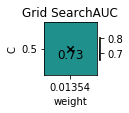

In [2736]:
plot_meta_2d(meta = i_meta2, first_dimention = 'C', second_dimention = 'weight', b_best = 'AUC')

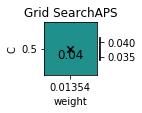

In [2737]:
plot_meta_2d(meta = i_meta2, first_dimention = 'C', second_dimention = 'weight', b_best = 'APS')

In [2738]:
i_meta2.to_csv(PATH +'Modeling_' + modeling + '/meta_file_after_pvalue.csv', sep='&')

In [2739]:
i_meta2 = pd.read_csv(PATH +'Modeling_' + modeling + '/meta_file_after_pvalue.csv', sep='&')

In [2740]:
train3 = train2.copy()
test3 = test2.copy()
list_of_columns_no_sys3 = list_of_columns_no_sys.copy()

for i in list_of_columns_no_sys:
    if i not in train3.columns.to_list():
        list_of_columns_no_sys3.remove(i)

attribute_list_model = attributes_list_new(train3, list_of_columns_no_sys3, [1, 98, 99, 99.99])

non_outliers = attribute_list_model.loc[attribute_list_model['99%'] == attribute_list_model['1%'], 
                                                'attribute'].to_list()
cols_outliers = list_of_columns_no_sys.copy()
    
for o in non_outliers:
    if o in cols_outliers:
        cols_outliers.remove(o)
        
attribute_list_model['right_border'] = attribute_list_model['99%']
attribute_list_model['left_border'] = attribute_list_model['1%']
attribute_list_model.loc[attribute_list_model['attribute'].isin(non_outliers), 
                         'right_border'] = attribute_list_model['99.99%']

attribute_list_model.to_csv(PATH+'Modeling_' + modeling + '/attribute_list_model_after_pvalue2.csv')

[0.01   0.98   0.99   0.9999]
Number of finished repetitions: 0 | time:  03.07.2020 13:55:20


In [2741]:
oot1 = oot[list(train3.columns)]

In [2742]:
X_1_22, X_2_22, y_1_2, y_2, preproc2 = data_preprocessing(train3,
                                                          y_train, 
                                                        test3, 
                                                          y_test, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = attribute_list_model, 
                                                       var_col = 'attribute',
                                                       scale = 'mean', median = 'val_mediana', check_percentile = 5,
                                                   high_outlier = 'right_border', low_outlier = 'left_border', 
                                                       cols_outlier = cols_outliers, 
                                             cut_non_out_9999 = True)

X_3_2 = data_preprocessing_test(oot1, y_oot, necessary_fields_upper, categorial_list = list_of_categories_sel, 
                                drop_technical = True,
                            attribute_list = attribute_list_model, var_col = 'attribute',
                        median = 'val_mediana',
                      high_outlier = 'right_border', low_outlier = 'left_border', scale = preproc2, 
                                yeo_johnson = None, cols_outlier = cols_outliers)

In [2743]:
X_1_22.shape

(303764, 32)

In [2744]:
params_dict = {'weight_0':'class_weight', 'C': 'C', 'max_iter': 'max_iter'}
other_hyps = {'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear' }
pass_model = LogisticRegression

In [2745]:
print(50*'-', 'By AUC test', 50*'-')
auc_model, auc_scores, auc_test_pred = train_model_receive_stats(X_1_22, 
                                                                 y_1_2, X_2_22, y_2, 
                                                                 meta = i_meta2, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')


print(50*'-', 'By AUC oot', 50*'-')
auc_model, auc_scores_oot, auc_oot_pred = train_model_receive_stats(X_1_22, y_1_2, X_3_2, y_oot, 
                                                                 meta = i_meta2, by_var = 'AUC',
                                                                 params_dict =params_dict, 
                                                                 other_hyperparams = other_hyps, pass_model= pass_model, 
                                                                 need_business = False, 
                                                                 simple_b_score = None,
                                                                 business_dict = None, printed =True,
                                                                 task = 'binary')

-------------------------------------------------- By AUC test --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
03.07.2020 13:55:29 start of logit fit
03.07.2020 13:55:39 end of logit fit
03.07.2020 13:55:39
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.23183631103570196
--------------------
AUC =  0.7129575079761206
AUC train = 0.735093197332239
Gini =  0.4259150159522411
Gini train = 0.470186394664478
Stability = 0.9058429184369985
Average precision score =  0.031058162208461793
---------- Treshold by F_score ----------
Accuracy =  0.8942584617010595
Score F1 =  0.06342148373508073
Precision =  0.03594641199098023
Recall =  0.26911618669314796
Approval rate =  0.09959838296298254
-------------------------------------------------- By AUC oot --------------------------------------------------
{'class_weight': {0: 0.013537453621686669, 1: 1}, 'C': 0.5, 'max_iter': 300, 'penalty': 'l2', 'random_state': 241, 'solver': 'liblinear'}
03.07.2020 13:55:40 start of logit fit
03.07.2020 13:55:50 end of logit fit
03.07.2020 13:55:50
-------------------- Statistics --------------------


C:\Users\dkotereva\Filter_and_Grid_Search.py:4559: RuntimeWarning: invalid value encountered in true_divide
  f_score = (2*p_f_score*r_f_score)/(p_f_score+r_f_score)


Brier score =  0.23932285560178987
--------------------
AUC =  0.7184656571244912
AUC train = 0.735093197332239
Gini =  0.43693131424898235
Gini train = 0.470186394664478
Stability = 0.9292725591534263
Average precision score =  0.026403891279655714
---------- Treshold by F_score ----------
Accuracy =  0.8937497381007967
Score F1 =  0.05765861428192196
Precision =  0.03210548099095371
Recall =  0.28251821019771073
Approval rate =  0.10124574226723895


In [2746]:
joblib.dump(auc_model, PATH+ 'Modeling_' + modeling + '/auc_model2.dat')
joblib.dump(preproc2, PATH+ 'Modeling_' + modeling + '/preproc2.dat')

['D:/Share/01 -Risk Desc Science/CRM/Branch_2019/Modeling_forward/preproc2.dat']

In [2747]:
auc_tests = pd.DataFrame(auc_test_pred)
auc_tests.rename(columns = {0: 'prediction'}, inplace = True)

Text(0.5, 1.0, 'Histograms 0 class')

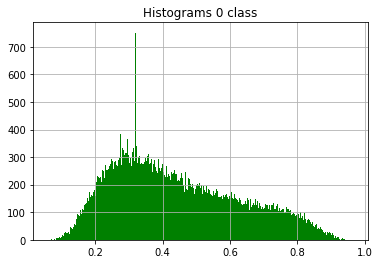

In [2748]:
auc_tests.loc[y_2 == 0, 'prediction'].hist(bins = 500, color = 'green')
plt.title('Histograms 0 class')

Text(0.5, 1.0, 'Histograms 1 class')

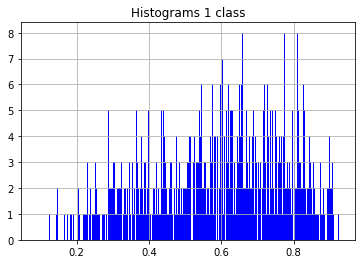

In [2749]:
auc_tests.loc[y_2 == 1, 'prediction'].hist(bins = 500, color = 'blue')
plt.title('Histograms 1 class')

In [2750]:
y_2.value_counts()

0    74687
1     1007
Name: GOOD_FLAG, dtype: int64

In [2751]:
X_1_22.shape

(303764, 32)

In [2752]:
betas = []

for i, v in enumerate(X_1_22.columns):
    betas.append([v, auc_model.coef_[0][i]])
    
betas.append(['Intercept', auc_model.intercept_[0]])

betas = pd.DataFrame.from_records(betas, columns = ['Variable', 'Coef'])
definition_2 = pd.read_csv(PATH + 'Selection/SandBox/definition_2.csv')
betas1 = pd.merge(betas, definition_2.rename(columns = {'variable': 'Variable'}), how = 'left', on = 'Variable')
betas1['abs_coef'] = abs(betas1['Coef'])
betas1.sort_values(by = 'abs_coef', ascending = False)
betas1.to_csv(PATH +'Modeling_' + modeling + '/betas3.csv', sep='&')
betas.to_csv(PATH +'Modeling_' + modeling + '/betas_new3.csv', sep='&')

In [2753]:
for_del = ['ScoreF1_b_best', 'Acc_b_best', 'Pre_b_best', 'Rec_b_best', 
               'Approval_rate_b_best', 'b_best']
for i in for_del:
    if i in auc_scores.keys():
        auc_scores.pop(i, None)
        
scores = pd.DataFrame(auc_scores)
scores.to_csv(PATH +'Modeling_' + modeling + '/scores_test.csv', sep='&')

for i in for_del:
    if i in auc_scores_oot.keys():
        auc_scores_oot.pop(i, None)
        
scores_oot = pd.DataFrame(auc_scores_oot)
scores_oot.to_csv(PATH +'Modeling_' + modeling + '/scores_oot.csv', sep='&')

In [2754]:
oot2 = oot.join(y_oot)
oot2 = oot2.join(pd.Series(auc_oot_pred, name='score'))
oot2.to_csv(PATH +'Modeling_' + modeling + '/oot_with_scores.csv', sep='&')

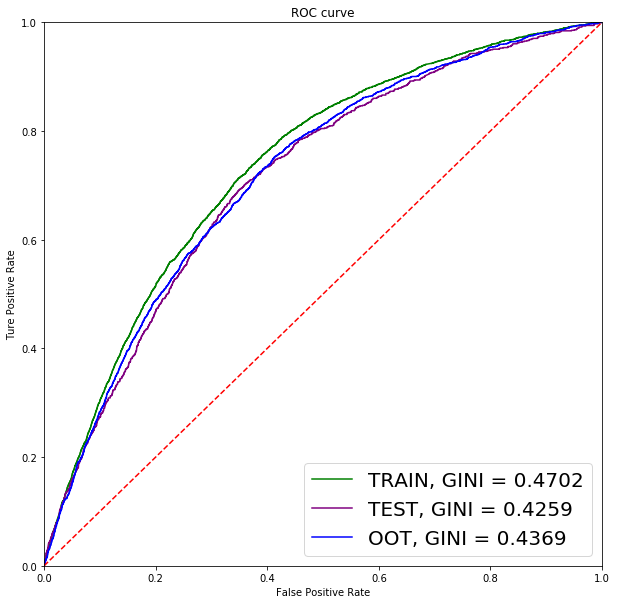

In [2755]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = auc_model

y_pred_train = clf.predict_proba(X_1_22)[:,1]
#train_loss = log_loss(y_1_r, y_pred_train)
y_pred_test = clf.predict_proba(X_2_22)[:,1]
y_pred_oot = clf.predict_proba(X_3_2)[:,1]

fpr_train, tpr_train, _ = metrics.roc_curve(y_1_2, y_pred_train)
fpr_test, tpr_test, _ = metrics.roc_curve(y_2, y_pred_test)
fpr_oot, tpr_oot, _ = metrics.roc_curve(y_oot, y_pred_oot)
gini_train = 2 * metrics.auc(fpr_train,tpr_train) - 1
gini_test = 2 * metrics.auc(fpr_test,tpr_test) - 1
gini_oot = 2 * metrics.auc(fpr_oot,tpr_oot) - 1

plt.figure(figsize = (10, 10))

#plt.legend(fontsize=200) # using a size in points
#plt.legend(fontsize="x-large")

plt.title('ROC curve')

plt.plot(fpr_train, tpr_train, label = 'TRAIN, GINI = %0.4f'%gini_train, color = 'green')
plt.plot(fpr_test, tpr_test, label = 'TEST, GINI = %0.4f'%gini_test, color = 'purple')
plt.plot(fpr_oot, tpr_oot, label = 'OOT, GINI = %0.4f'%gini_oot, color = 'blue')

plt.legend(loc = 'lower right', fontsize=20)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Ture Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()## По месяцам

### Lightgbm

In [2761]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier

oot_gbm = oot[list(train3.columns)]

In [2762]:
train_lgbm_data, test_lgbm_data, y_1_2, y_2 = data_preprocessing(train3,
                                                          y_train, 
                                                        test3, 
                                                          y_test, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = None, 
                                                       var_col = None,
                                                       scale = False, median = 'median', check_percentile = 5,
                                                   high_outlier = None, low_outlier = None, 
                                                       cols_outlier = [], 
                                             cut_non_out_9999 = False)

train_lgbm_data, oot_lgbm_data, y_1_2, y_3 = data_preprocessing(train3,
                                                          y_train, 
                                                        oot_gbm, 
                                                          y_oot, necessary_fields_upper, 
                                                       categorial_list = list_of_categories_sel,
                                                 yeo_johnson = False, attribute_list = None, 
                                                       var_col = None,
                                                       scale = False, median = 'median', check_percentile = 5,
                                                   high_outlier = None, low_outlier = None, 
                                                       cols_outlier = [], 
                                             cut_non_out_9999 = False)

In [2763]:
params_lgbm = {
    'boosting_type': 'gbdt',
    'max_depth': 3,
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'verbose': 0,
    'n_estimators': 100,
    'class_weight': {0: w_b, 1: 1},
    'random_state': 241, 
    'n_jobs': 5}

In [2764]:
lightgbm_class = LGBMClassifier(**params_lgbm)
from datetime import datetime
print('Starting training...', datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S"))
# train
gbm = lightgbm_class.fit(train_lgbm_data, y_1_2)
print('Ending training...', datetime.strftime(datetime.now(), "%d.%m.%Y %H:%M:%S"))

y_train_pred = gbm.predict_proba(train_lgbm_data)[:, 1]
y_test_pred = gbm.predict_proba(test_lgbm_data)[:, 1]
y_oot_pred = gbm.predict_proba(oot_lgbm_data)[:, 1]

print('gini train = ', roc_auc_score(y_1_2, y_train_pred)*2-1, 
      'average precision score train = ', average_precision_score(y_train, y_train_pred))

print('gini test = ', roc_auc_score(y_2, y_test_pred)*2-1, 
      'average precision score test = ', average_precision_score(y_test, y_test_pred))

print('gini oot = ', roc_auc_score(y_3, y_oot_pred)*2-1, 
      'average precision score oot = ', average_precision_score(y_oot, y_oot_pred))

Starting training... 03.07.2020 13:56:12
Ending training... 03.07.2020 13:56:15
gini train =  0.525405836571589 average precision score train =  0.05153144387145392
gini test =  0.4301526945773788 average precision score test =  0.032546269392163776
gini oot =  0.4481290366440558 average precision score oot =  0.030227789946320673


In [2765]:
scores_lightgbm = pd.DataFrame()

scores_lightgbm['gini_train'] = [roc_auc_score(y_1_2, y_train_pred)*2-1]
scores_lightgbm['gini_test'] = [roc_auc_score(y_2, y_test_pred)*2-1]
scores_lightgbm['gini_oot'] = [roc_auc_score(y_3, y_oot_pred)*2-1]
scores_lightgbm['APS_train'] = [average_precision_score(y_train, y_train_pred)]
scores_lightgbm['APS_test'] = [average_precision_score(y_test, y_test_pred)]
scores_lightgbm['APS_oot'] = [average_precision_score(y_oot, y_oot_pred)]

In [2766]:
scores_lightgbm

,gini_train,gini_test,gini_oot,APS_train,APS_test,APS_oot
0,0.525406,0.430153,0.448129,0.051531,0.032546,0.030228


In [2767]:
scores_lightgbm.to_csv(PATH+ 'Modeling_' + modeling + '/scores_lightgbm.csv', sep='&')